# Phase 3 : Analyses Statistiques Approfondies

**Objectif :** Réaliser des analyses statistiques pour répondre aux questions métier
## Contenu du Notebook

1. **Analyses Univariées Approfondies**
   - Distribution détaillée des variables clés

2. **Analyses Bivariées**
   - Variables catégorielles vs y (Tests Chi-deux)
   - Variables numériques vs y (Tests ANOVA, t-test)

3. **Analyses Multivariées**
   - Interactions entre variables

4. **Réponses aux Questions Métier**
   - Quels clients cibler ?
   - Quand contacter ?
   - Combien de contacts ?

5. **Recommandations Stratégiques**
   - Segments prioritaires
   - Budget et KPI

---

## Rappel : Dataset Actuel

Après Phase 2 (Nettoyage) :
- Fichier : bank-additional-full-cleaned.csv
- Lignes : 40,858
- Colonnes : 21
- Variable cible : 11.27% yes / 88.73% no
- Perte totale : 0.80%

---

### Imports et Configuration

In [4]:
# Imports des bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
import warnings

In [5]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# Style des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

### Chargement du Dataset

In [8]:
df = pd.read_csv(r'A:\Mes documents\projet analyse exploiratoire\data\bank-additional-full-cleaned.csv', sep=';')
print(f"\nDataset charge : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")


Dataset charge : 40,858 lignes × 21 colonnes


In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40853,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
40854,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
40855,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
40856,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [11]:
y_counts = df['y'].value_counts()
y_percent = df['y'].value_counts(normalize=True) * 100
print("\nDistribution de y :")
for category in y_counts.index:
    print(f"  {category:5s} : {y_counts[category]:6,} ({y_percent[category]:5.2f}%)")


Distribution de y :
  no    : 36,255 (88.73%)
  yes   :  4,603 (11.27%)



## PARTIE 1 : Analyses Univariées Approfondies

**Objectif :** Comprendre en détail la distribution de chaque variable importante.

**Variables analysées :**
1. Age (numérique) - Démographique
2. Job (catégorielle) - Démographique
3. Education (catégorielle) - Démographique
4. Marital (catégorielle) - Démographique
5. Month (catégorielle) - Temporelle
6. Campaign (numérique) - Campagne
7. Previous (numérique) - Campagne
8. Poutcome (catégorielle) - Campagne
9. Default (catégorielle) - Financière

**Pourquoi cette étape ?**
- Identifier les valeurs typiques et atypiques
- Comprendre la structure des données
- Préparer les analyses bivariées



Statistiques descriptives :
count   40858.00
mean       39.98
std        10.40
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        98.00
Name: age, dtype: float64

Mode (valeur la plus frequente) : 31 ans

Quartiles detailles :
  10% : 28 ans
  25% : 32 ans
  50% : 38 ans
  75% : 47 ans
  90% : 55 ans

Repartition par tranche d'age :
  <25      :  1,658 ( 4.06%)
  25-35    : 14,777 (36.17%)
  35-45    : 12,750 (31.21%)
  45-55    :  8,151 (19.95%)
  55-65    :  2,913 ( 7.13%)
  65+      :    609 ( 1.49%)


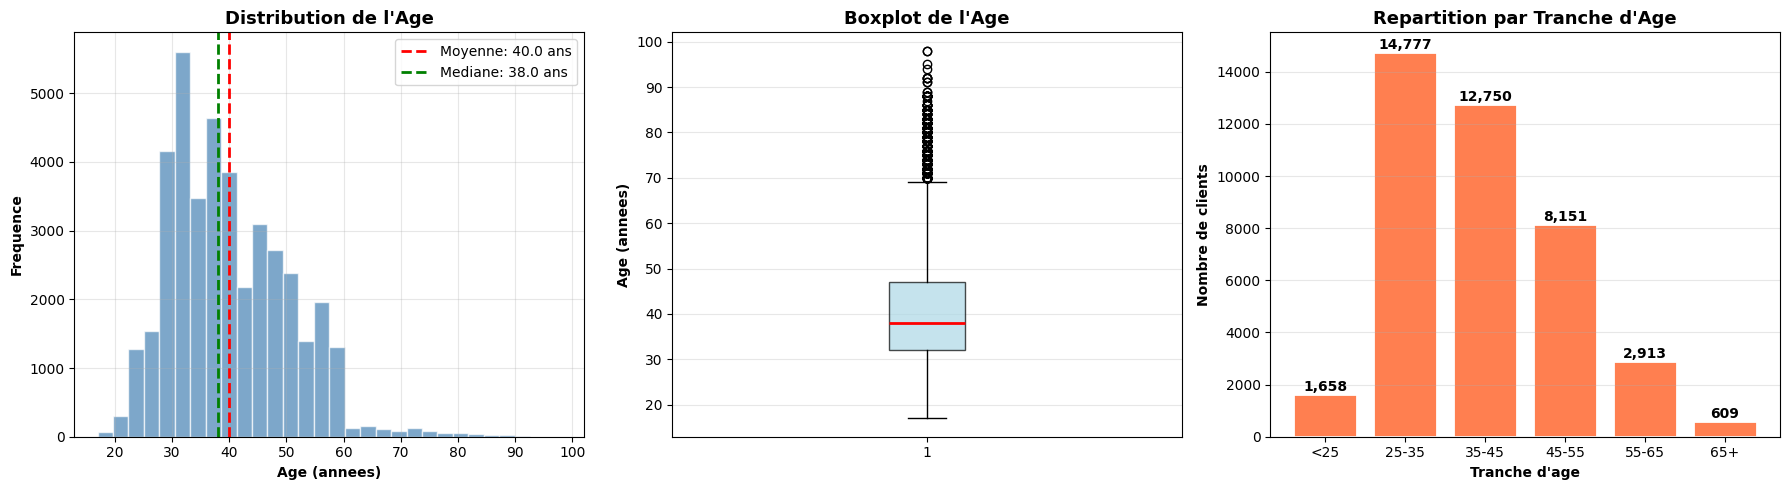


Graphique sauvegardé dans  : 06_univariee_age.png


In [12]:

# ANALYSE UNIVARIEE 1/9 : AGE



print("\nStatistiques descriptives :")
age_stats = df['age'].describe()
print(age_stats)


mode_age = df['age'].mode()[0]
print(f"\nMode (valeur la plus frequente) : {mode_age} ans")


print("\nQuartiles detailles :")
quartiles = df['age'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
for q, val in quartiles.items():
    print(f"  {int(q*100):2d}% : {val:.0f} ans")

#tranches d'age
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_dist = df['age_group'].value_counts().sort_index()
print("\nRepartition par tranche d'age :")
for groupe, count in age_dist.items():
    pct = (count / len(df)) * 100
    print(f"  {groupe:8s} : {count:6,} ({pct:5.2f}%)")





fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# Histogramme
axes[0].hist(df['age'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Moyenne: {df["age"].mean():.1f} ans')
axes[0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Mediane: {df["age"].median():.1f} ans')
axes[0].set_xlabel('Age (annees)', fontweight='bold')
axes[0].set_ylabel('Frequence', fontweight='bold')
axes[0].set_title('Distribution de l\'Age', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
bp = axes[1].boxplot(df['age'], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Age (annees)', fontweight='bold')
axes[1].set_title('Boxplot de l\'Age', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')


# Barplot par tranches
bars = axes[2].bar(age_dist.index, age_dist.values, color='coral', edgecolor='white', linewidth=2)
axes[2].set_xlabel('Tranche d\'age', fontweight='bold')
axes[2].set_ylabel('Nombre de clients', fontweight='bold')
axes[2].set_title('Repartition par Tranche d\'Age', fontsize=13, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_age.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans  : 06_univariee_age.png")


Nombre de categories : 11

Distribution des metiers :
  admin.               : 10,422 (25.51%)
  blue-collar          :  9,254 (22.65%)
  technician           :  6,743 (16.50%)
  services             :  3,969 ( 9.71%)
  management           :  2,924 ( 7.16%)
  retired              :  1,720 ( 4.21%)
  entrepreneur         :  1,456 ( 3.56%)
  self-employed        :  1,421 ( 3.48%)
  housemaid            :  1,060 ( 2.59%)
  unemployed           :  1,014 ( 2.48%)
  student              :    875 ( 2.14%)


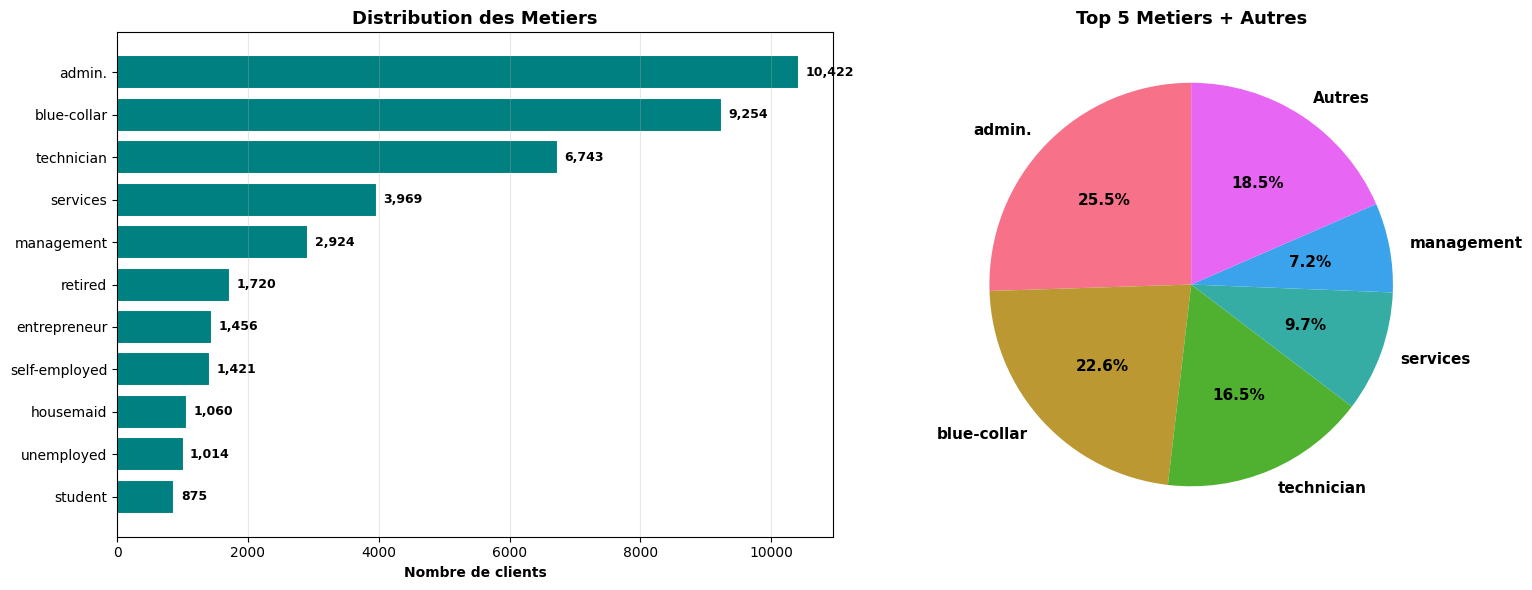


Graphique sauvegardé dans : 06_univariee_job.png

Metier le plus representé est  : admin. (10,422 clients)


In [13]:

# ANALYSE UNIVARIEE 2/9 : JOB 




job_counts = df['job'].value_counts()
job_percent = df['job'].value_counts(normalize=True) * 100

print(f"\nNombre de categories : {len(job_counts)}")
print("\nDistribution des metiers :")
for metier, count in job_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {metier:20s} : {count:6,} ({pct:5.2f}%)")



fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot horizontal
job_counts_sorted = job_counts.sort_values(ascending=True)
axes[0].barh(job_counts_sorted.index, job_counts_sorted.values, color='teal', edgecolor='white', linewidth=1.5)
axes[0].set_xlabel('Nombre de clients', fontweight='bold')
axes[0].set_title('Distribution des Metiers', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

for i, v in enumerate(job_counts_sorted.values):
    axes[0].text(v + 100, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

# Pie chart Top 5 et  Autres
top5_jobs = job_counts.head(5)
other_jobs = job_counts[5:].sum()
pie_data = list(top5_jobs.values) + [other_jobs]
pie_labels = list(top5_jobs.index) + ['Autres']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Top 5 Metiers + Autres', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_job.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_job.png")
print(f"\nMetier le plus representé est  : {job_counts.index[0]} ({job_counts.values[0]:,} clients)")


Nombre de categories : 8

Distribution :
  university.degree         : 12,123 (29.67%)
  high.school               :  9,478 (23.20%)
  basic.9y                  :  6,014 (14.72%)
  professional.course       :  5,231 (12.80%)
  basic.4y                  :  4,124 (10.09%)
  basic.6y                  :  2,270 ( 5.56%)
  unknown                   :  1,600 ( 3.92%)
  illiterate                :     18 ( 0.04%)

Valeurs 'unknown' : 1,600 (3.92%)
Note : Ces valeurs ont ete gardées 


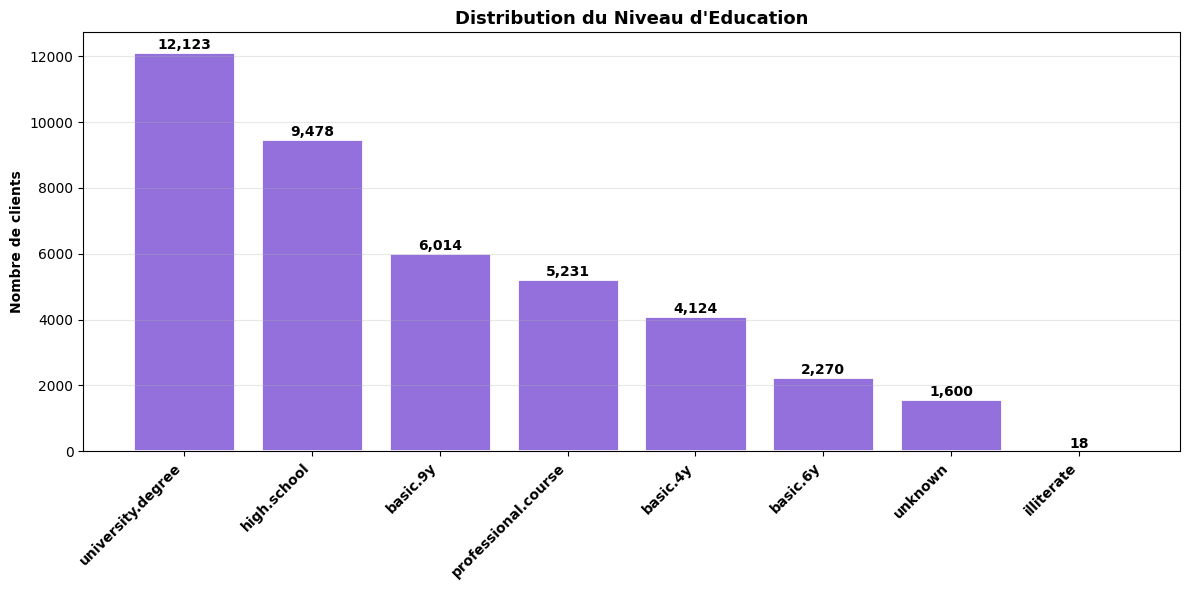


Graphique sauvegardé dans : 06_univariee_education.png


In [14]:

# ANALYSE UNIVARIEE 3/9 : EDUCATION




edu_counts = df['education'].value_counts()
print(f"\nNombre de categories : {len(edu_counts)}")
print("\nDistribution :")
for edu, count in edu_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {edu:25s} : {count:6,} ({pct:5.2f}%)")


# Verif des "unknown"
unknown_count = (df['education'] == 'unknown').sum()
print(f"\nValeurs 'unknown' : {unknown_count:,} ({unknown_count/len(df)*100:.2f}%)")
print("Note : Ces valeurs ont ete gardées ")


# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))

edu_sorted = edu_counts.sort_values(ascending=False)
bars = ax.bar(range(len(edu_sorted)), edu_sorted.values, color='mediumpurple', edgecolor='white', linewidth=2)
ax.set_xticks(range(len(edu_sorted)))
ax.set_xticklabels(edu_sorted.index, rotation=45, ha='right', fontweight='bold')
ax.set_ylabel('Nombre de clients', fontweight='bold')
ax.set_title('Distribution du Niveau d\'Education', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_education.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_education.png")


Nombre de categories : 4

Distribution :
  married         : 24,694 (60.44%)
  single          : 11,494 (28.13%)
  divorced        :  4,599 (11.26%)
  unknown         :     71 ( 0.17%)


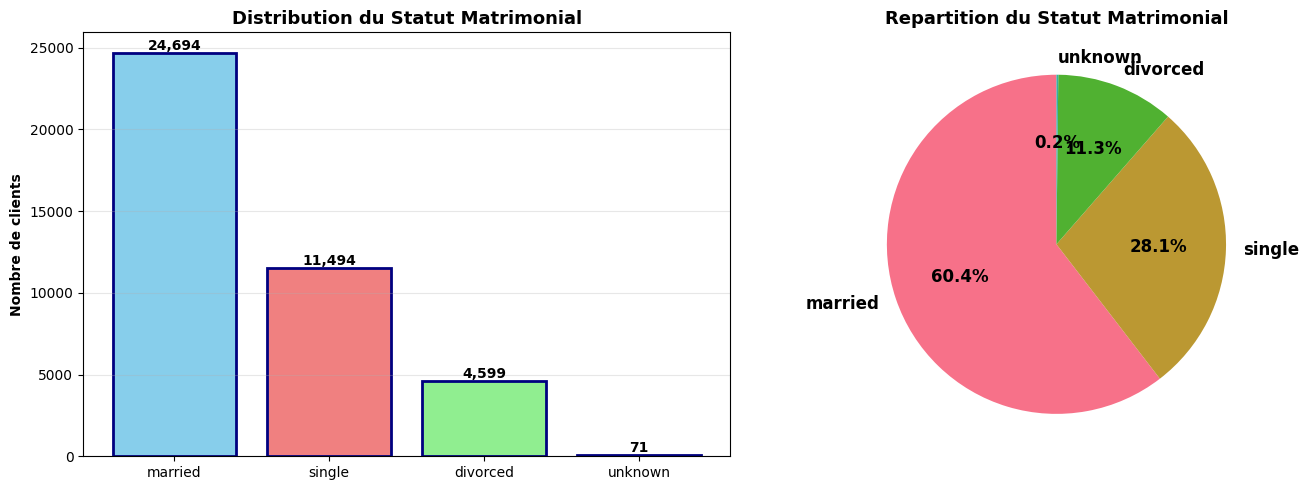


Graphique sauvegardé dans : 06_univariee_marital.png


In [15]:
# ANALYSE UNIVARIEE 4/9 : MARITAL 



marital_counts = df['marital'].value_counts()
print(f"\nNombre de categories : {len(marital_counts)}")
print("\nDistribution :")
for status, count in marital_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {status:15s} : {count:6,} ({pct:5.2f}%)")



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
bars = axes[0].bar(marital_counts.index, marital_counts.values, 
                   color=['skyblue', 'lightcoral', 'lightgreen', 'wheat'][:len(marital_counts)],
                   edgecolor='navy', linewidth=2)
axes[0].set_ylabel('Nombre de clients', fontweight='bold')
axes[0].set_title('Distribution du Statut Matrimonial', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Repartition du Statut Matrimonial', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_marital.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_marital.png")


Nombre de mois differents : 10

Distribution des contacts par mois (ordre chronologique) :
  mar   :    544 ( 1.33%)
  apr   :  2,623 ( 6.42%)
  may   : 13,649 (33.41%)
  jun   :  5,256 (12.86%)
  jul   :  7,122 (17.43%)
  aug   :  6,118 (14.97%)
  sep   :    562 ( 1.38%)
  oct   :    710 ( 1.74%)
  nov   :  4,094 (10.02%)
  dec   :    180 ( 0.44%)


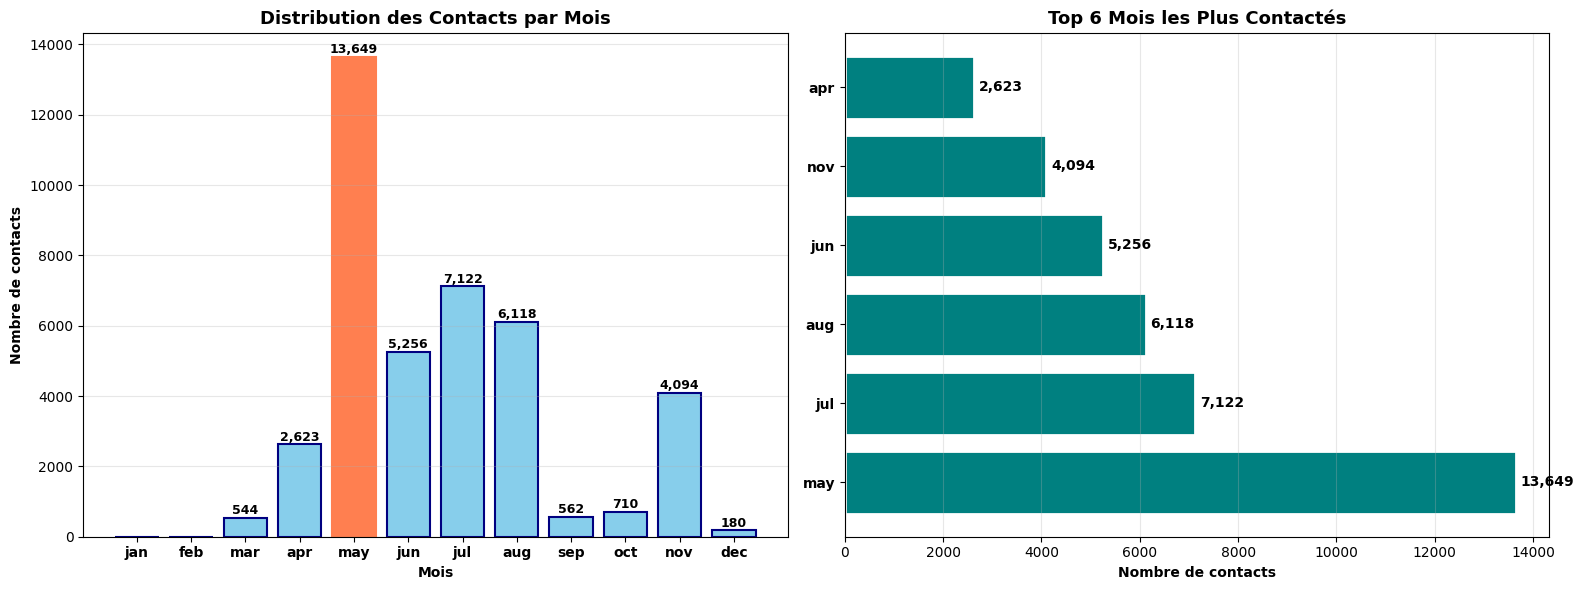


Graphique sauvegardé dans : 06_univariee_month.png

 Le mois avec le plus de contacts  est : may (13,649 contacts)


In [16]:

# ANALYSE UNIVARIEE 5/9 : MONTH 



month_counts = df['month'].value_counts()
print(f"\nNombre de mois differents : {len(month_counts)}")


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_ordered = df['month'].value_counts().reindex(month_order, fill_value=0)

print("\nDistribution des contacts par mois (ordre chronologique) :")
for mois, count in month_ordered.items():
    if count > 0:
        pct = (count / len(df)) * 100
        print(f"  {mois:5s} : {count:6,} ({pct:5.2f}%)")




fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Barplot chronologique
bars = axes[0].bar(range(len(month_ordered)), month_ordered.values, 
                   color='skyblue', edgecolor='navy', linewidth=1.5)
axes[0].set_xticks(range(len(month_ordered)))
axes[0].set_xticklabels(month_ordered.index, fontweight='bold')
axes[0].set_xlabel('Mois', fontweight='bold')
axes[0].set_ylabel('Nombre de contacts', fontweight='bold')
axes[0].set_title('Distribution des Contacts par Mois', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Coloration du  mois avec le plus de contacts
max_idx = month_ordered.values.argmax()
bars[max_idx].set_color('coral')

for i, v in enumerate(month_ordered.values):
    if v > 0:
        axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

# Graphique 2 : Top des  mois uniquement
top_months = month_counts.head(6)
axes[1].barh(range(len(top_months)), top_months.values, color='teal', edgecolor='white', linewidth=2)
axes[1].set_yticks(range(len(top_months)))
axes[1].set_yticklabels(top_months.index, fontweight='bold')
axes[1].set_xlabel('Nombre de contacts', fontweight='bold')
axes[1].set_title('Top 6 Mois les Plus Contactés', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

for i, v in enumerate(top_months.values):
    axes[1].text(v + 100, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_month.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGraphique sauvegardé dans : 06_univariee_month.png")
print(f"\n Le mois avec le plus de contacts  est : {month_ordered.idxmax()} ({month_ordered.max():,} contacts)")


Statistiques descriptives :
count   40858.00
mean        2.57
std         2.77
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        56.00
Name: campaign, dtype: float64

Quartiles :
  25% : 1 contacts
  50% : 2 contacts
  75% : 3 contacts
  90% : 5 contacts
  95% : 7 contacts

Mode : 1 contacts
Maximum : 56 contacts

Repartition par intensite de contacts :
  1-2 (Faible)         : 27,988 (68.50%)
  3-5 (Moyen)          :  9,521 (23.30%)
  6+ (Eleve)           :  3,349 ( 8.20%)


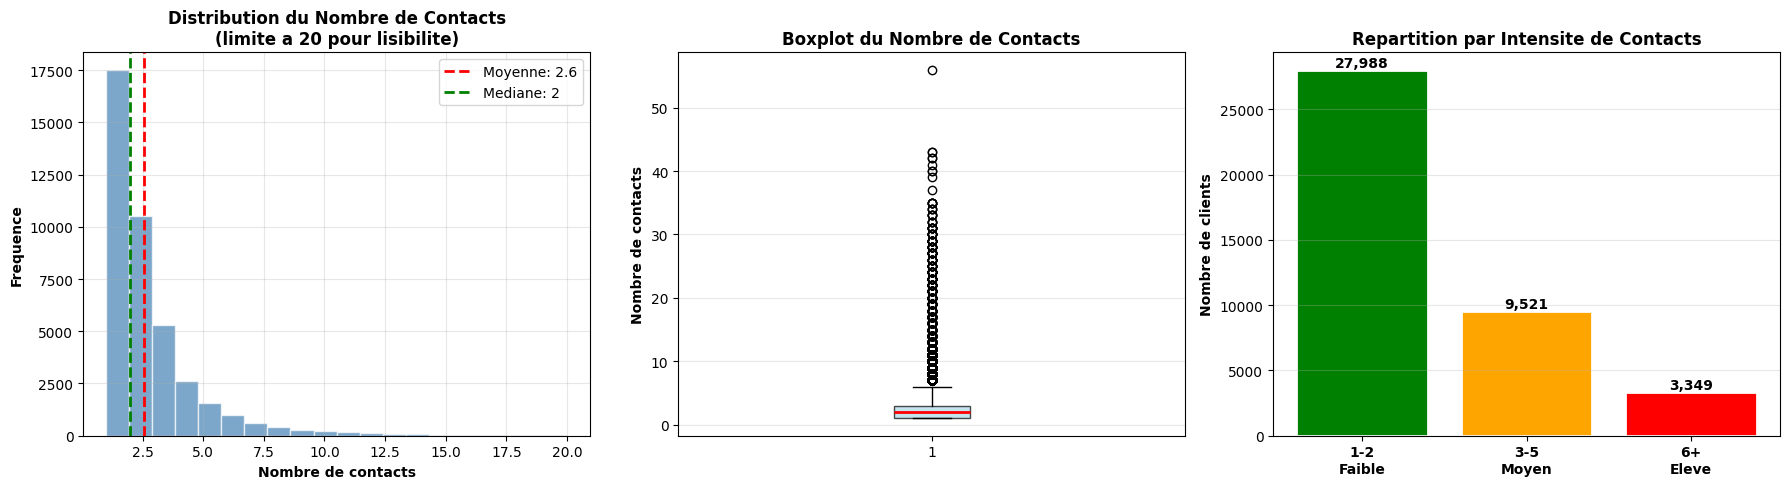


Graphique sauvegardé dans : 06_univariee_campaign.png


In [17]:

# ANALYSE UNIVARIEE 6/9 : CAMPAIGN 


print("\nStatistiques descriptives :")
campaign_stats = df['campaign'].describe()
print(campaign_stats)


print("\nQuartiles :")
quartiles = df['campaign'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])
for q, val in quartiles.items():
    print(f"  {int(q*100):2d}% : {val:.0f} contacts")

print(f"\nMode : {df['campaign'].mode()[0]:.0f} contacts")
print(f"Maximum : {df['campaign'].max():.0f} contacts")

# Création de catégories
def categorize_campaign(n):
    if n <= 2:
        return '1-2 (Faible)'
    elif n <= 5:
        return '3-5 (Moyen)'
    else:
        return '6+ (Eleve)'

df['campaign_category'] = df['campaign'].apply(categorize_campaign)
campaign_cat_counts = df['campaign_category'].value_counts()

print("\nRepartition par intensite de contacts :")
for cat, count in campaign_cat_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {cat:20s} : {count:6,} ({pct:5.2f}%)")





fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogramme 
campaign_limited = df[df['campaign'] <= 20]['campaign']
axes[0].hist(campaign_limited, bins=20, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(df['campaign'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Moyenne: {df["campaign"].mean():.1f}')
axes[0].axvline(df['campaign'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Mediane: {df["campaign"].median():.0f}')
axes[0].set_xlabel('Nombre de contacts', fontweight='bold')
axes[0].set_ylabel('Frequence', fontweight='bold')
axes[0].set_title('Distribution du Nombre de Contacts\n(limite a 20 pour lisibilite)', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['campaign'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Nombre de contacts', fontweight='bold')
axes[1].set_title('Boxplot du Nombre de Contacts', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

# Barplot par catégories
cat_order = ['1-2 (Faible)', '3-5 (Moyen)', '6+ (Eleve)']
cat_counts = campaign_cat_counts.reindex(cat_order)
bars = axes[2].bar(range(len(cat_counts)), cat_counts.values, 
                   color=['green', 'orange', 'red'], edgecolor='white', linewidth=2)
axes[2].set_xticks(range(len(cat_counts)))
axes[2].set_xticklabels(['1-2\nFaible', '3-5\nMoyen', '6+\nEleve'], fontweight='bold')
axes[2].set_ylabel('Nombre de clients', fontweight='bold')
axes[2].set_title('Repartition par Intensite de Contacts', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_campaign.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_campaign.png")


Statistiques descriptives :
count   40858.00
mean        0.17
std         0.50
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         7.00
Name: previous, dtype: float64

Clients jamais contactes avant : 35,270 (86.32%)
Clients deja contactes avant   : 5,588 (13.68%)

Pour les clients deja contactes :
  Moyenne : 1.27 contacts
  Mediane : 1 contacts
  Maximum : 7 contacts


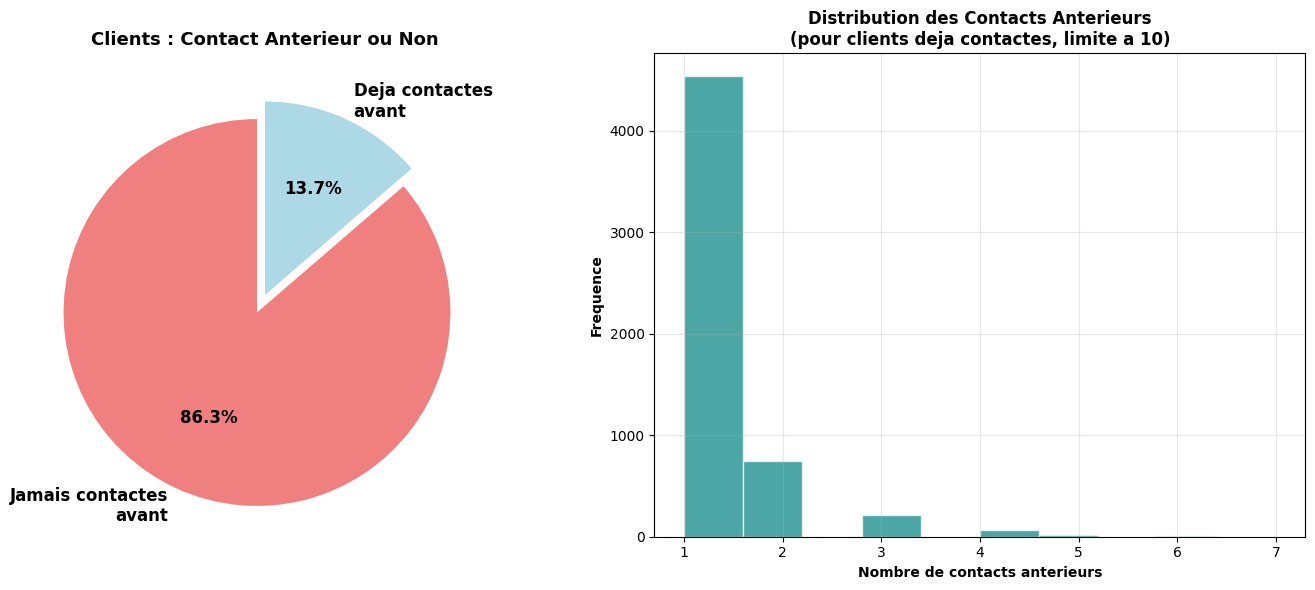


Graphique sauvegardé dans : 06_univariee_previous.png


In [18]:

# ANALYSE UNIVARIEE 7/9 : PREVIOUS 




print("\nStatistiques descriptives :")
previous_stats = df['previous'].describe()
print(previous_stats)


jamais_contactes = (df['previous'] == 0).sum()
deja_contactes = (df['previous'] > 0).sum()

print(f"\nClients jamais contactes avant : {jamais_contactes:,} ({jamais_contactes/len(df)*100:.2f}%)")
print(f"Clients deja contactes avant   : {deja_contactes:,} ({deja_contactes/len(df)*100:.2f}%)")

# Distribution pour ceux qui ont été contactés
df_contactes = df[df['previous'] > 0]
if len(df_contactes) > 0:
    print(f"\nPour les clients deja contactes :")
    print(f"  Moyenne : {df_contactes['previous'].mean():.2f} contacts")
    print(f"  Mediane : {df_contactes['previous'].median():.0f} contacts")
    print(f"  Maximum : {df_contactes['previous'].max():.0f} contacts")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Pie chart : Contactés vs Non contactés
labels = ['Jamais contactes\navant', 'Deja contactes\navant']
sizes = [jamais_contactes, deja_contactes]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Clients : Contact Anterieur ou Non', fontsize=13, fontweight='bold')

# Histogramme pour ceux contactés 
if len(df_contactes) > 0:
    previous_limited = df_contactes[df_contactes['previous'] <= 10]['previous']
    axes[1].hist(previous_limited, bins=10, color='teal', edgecolor='white', alpha=0.7)
    axes[1].set_xlabel('Nombre de contacts anterieurs', fontweight='bold')
    axes[1].set_ylabel('Frequence', fontweight='bold')
    axes[1].set_title('Distribution des Contacts Anterieurs\n(pour clients deja contactes, limite a 10)', 
                      fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_previous.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_previous.png")


Nombre de categories : 3

Distribution :
  nonexistent     : 35,270 (86.32%)
  failure         :  4,234 (10.36%)
  success         :  1,354 ( 3.31%)


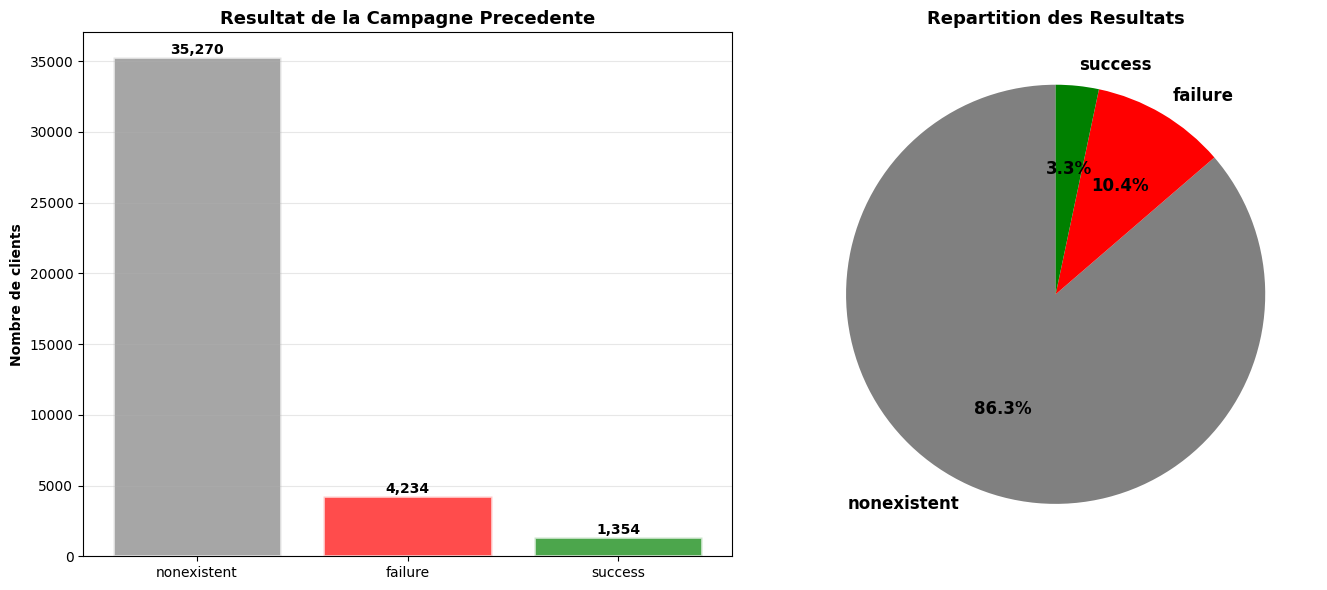


Graphique sauvegardé dans : 06_univariee_poutcome.png


In [19]:

# ANALYSE UNIVARIEE 8/9 : POUTCOME )

poutcome_counts = df['poutcome'].value_counts()
print(f"\nNombre de categories : {len(poutcome_counts)}")
print("\nDistribution :")
for outcome, count in poutcome_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {outcome:15s} : {count:6,} ({pct:5.2f}%)")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Barplot
colors_dict = {'nonexistent': 'gray', 'success': 'green', 'failure': 'red'}
colors = [colors_dict.get(x, 'blue') for x in poutcome_counts.index]

bars = axes[0].bar(poutcome_counts.index, poutcome_counts.values, 
                   color=colors, edgecolor='white', linewidth=2, alpha=0.7)
axes[0].set_ylabel('Nombre de clients', fontweight='bold')
axes[0].set_title('Resultat de la Campagne Precedente', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')



# Pie chart
axes[1].pie(poutcome_counts.values, labels=poutcome_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Repartition des Resultats', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_poutcome.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_poutcome.png")


Nombre de categories : 3

Distribution :
  no              : 32,410 (79.32%)
  unknown         :  8,445 (20.67%)
  yes             :      3 ( 0.01%)

Valeurs 'unknown' : 8,445 (20.67%)
Decision : GARDEES 


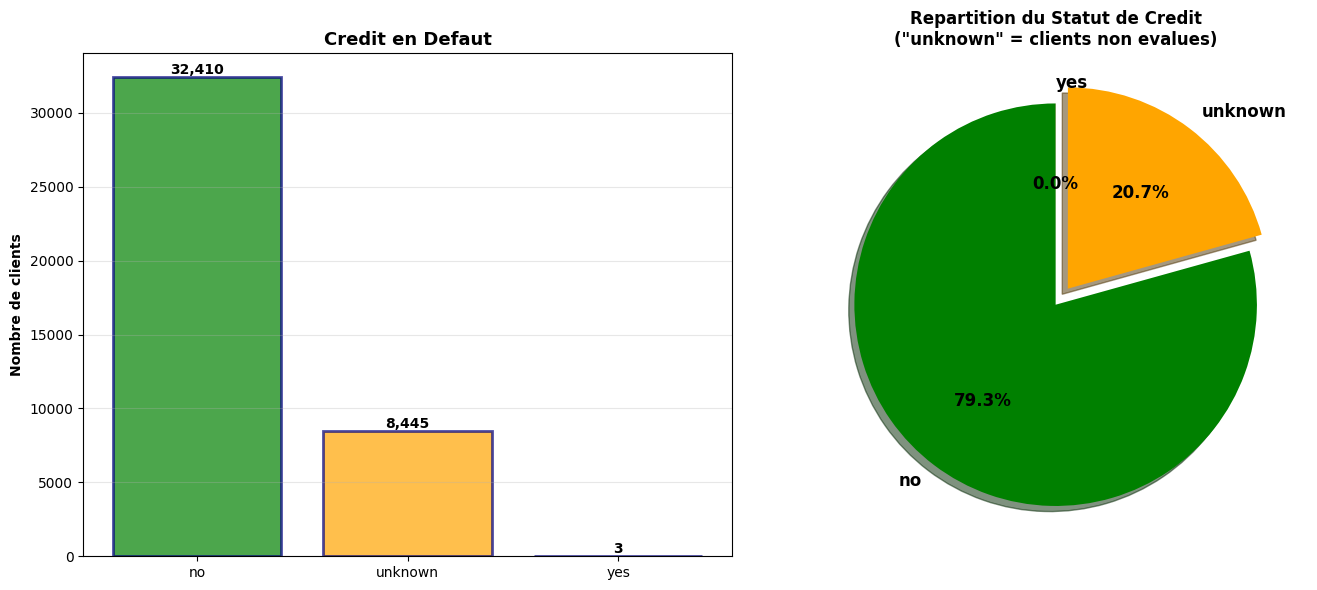


Graphique sauvegardé dans : 06_univariee_default.png


In [20]:

# ANALYSE UNIVARIEE 9/9 : DEFAULT 

default_counts = df['default'].value_counts()
print(f"\nNombre de categories : {len(default_counts)}")
print("\nDistribution :")
for status, count in default_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {status:15s} : {count:6,} ({pct:5.2f}%)")



# Vérif des "unkown"
unknown_default = (df['default'] == 'unknown').sum()
print(f"\nValeurs 'unknown' : {unknown_default:,} ({unknown_default/len(df)*100:.2f}%)")
print("Decision : GARDEES ")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Barplot
colors_default = {'no': 'green', 'yes': 'red', 'unknown': 'orange'}
colors = [colors_default.get(x, 'blue') for x in default_counts.index]

bars = axes[0].bar(default_counts.index, default_counts.values, 
                   color=colors, edgecolor='navy', linewidth=2, alpha=0.7)
axes[0].set_ylabel('Nombre de clients', fontweight='bold')
axes[0].set_title('Credit en Defaut', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')



# Pie chart avec explosion de "unknown"
explode_vals = [0.1 if x == 'unknown' else 0 for x in default_counts.index]
axes[1].pie(default_counts.values, labels=default_counts.index, autopct='%1.1f%%',
            colors=colors, explode=explode_vals, startangle=90, shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Repartition du Statut de Credit\n("unknown" = clients non evalues)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\06_univariee_default.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé dans : 06_univariee_default.png")


## PARTIE 2 : Analyses Bivariées : Variables vs y 

**Objectif :** Identifier quelles variables influencent la souscription (y) et dans quelle mesure.

**Méthode :**
- Variables catégorielles vs y : Test du Chi-deux
- Variables numériques vs y : Test ANOVA / t-test
- Seuil de significativité : p-value < 0.05

**Questions métier auxquelles nous allons répondre :**

1. **Quel âge souscrit le plus ?** (age vs y)
2. **Quel métier souscrit le plus ?** (job vs y)
3. **Quel niveau d'éducation souscrit le plus ?** (education vs y)
4. **Les célibataires ou mariés souscrivent plus ?** (marital vs y)
5. **Quel mois est le meilleur pour contacter ?** (month vs y)
6. **Combien de contacts sont optimaux ?** (campaign vs y)
7. **Recontacter les anciens clients fonctionne-t-il ?** (previous, poutcome vs y)
8. **Le statut de crédit influence-t-il ?** (default vs y)
9. **Le contexte économique influence-t-il ?** (variables socio-éco vs y)

**Tests statistiques utilisés :**

- **Test du Chi-deux** : 
  - Pour variables catégorielles vs y
  - H0 : Les deux variables sont indépendantes
  - Si p-value < 0.05 : Relation significative

- **Test ANOVA** :
  - Pour variable numérique vs variable catégorielle
  - Compare les moyennes entre groupes
  - Si p-value < 0.05 : Différence significative

- **Test t de Student** :
  - Compare 2 moyennes (yes vs no)
  - Si p-value < 0.05 : Différence significative



Tableau croise : Tranche d'age vs Souscription
y             no   yes    All
age_group                    
<25         1315   343   1658
25-35      13044  1733  14777
35-45      11664  1086  12750
45-55       7437   714   8151
55-65       2470   443   2913
65+          325   284    609
All        36255  4603  40858

Taux de souscription par tranche d'age :
y            no   yes
age_group            
<25       79.31 20.69
25-35     88.27 11.73
35-45     91.48  8.52
45-55     91.24  8.76
55-65     84.79 15.21
65+       53.37 46.63

Meilleure tranche : 65+ (46.63% souscrivent)
Pire tranche      : 35-45 (8.52% souscrivent)
Ecart             : 38.12 points

Test du Chi-deux :
  Chi2 = 1105.25
  p-value = 0.0000000000
  Conclusion : Relation SIGNIFICATIVE (p < 0.05)
  L'age influence VRAIMENT la souscription

Test t de Student (age moyen yes vs no) :
  Age moyen YES : 40.86 ans
  Age moyen NO  : 39.87 ans
  Difference    : 1.00 ans
  t-statistic   : 6.13
  p-value       : 0.0000000009
  Con

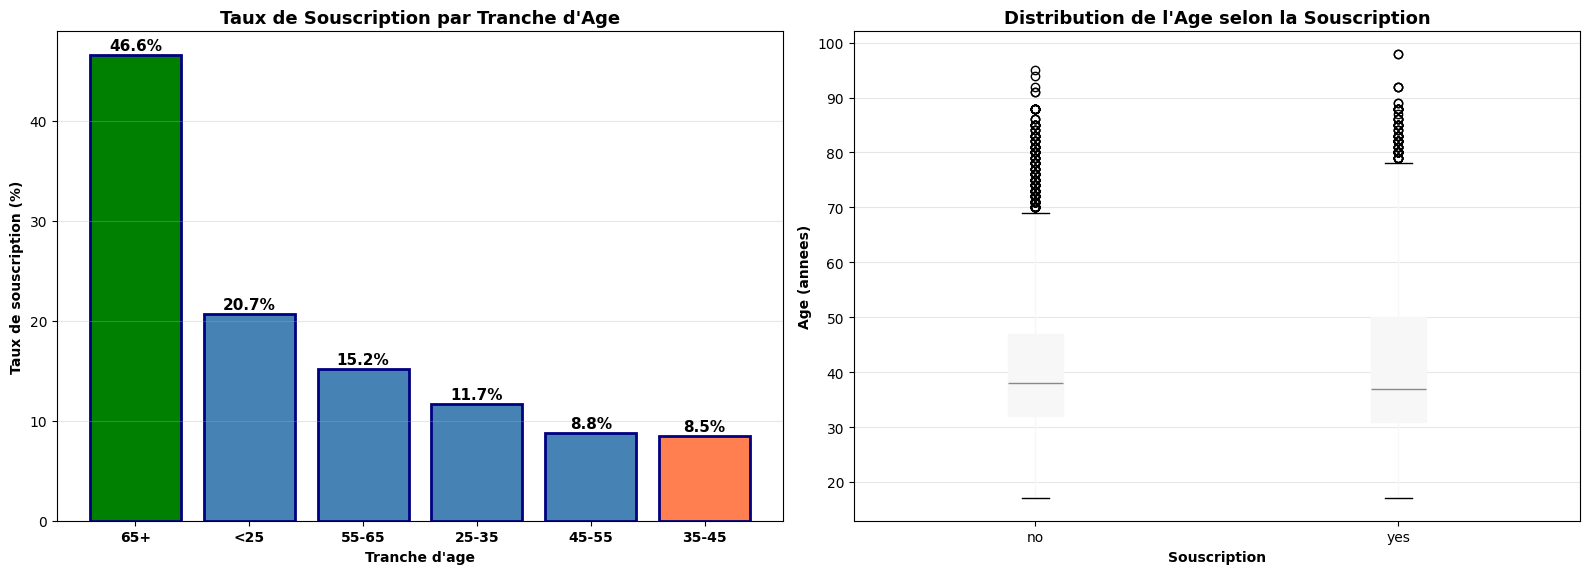


Graphique sauvegardé 07_bivariee_age_vs_y.png
SYNTHESE : AGE vs Y
Meilleure tranche    : 65+ (46.63%)
Pire tranche         : 35-45 (8.52%)
Relation statistique : SIGNIFICATIVE (p < 0.05)

 A faire 
  Cibler prioritairement : 65+
  Eviter                 : 35-45


In [29]:
# ANALYSE BIVARIEE 1/8 : AGE vs Y


print("\nTableau croise : Tranche d'age vs Souscription")
cross_tab = pd.crosstab(df['age_group'], df['y'], margins=True)
print(cross_tab)


print("\nTaux de souscription par tranche d'age :")
taux_par_age = pd.crosstab(df['age_group'], df['y'], normalize='index') * 100
print(taux_par_age.round(2))


meilleur_age = taux_par_age['yes'].idxmax()
meilleur_taux = taux_par_age['yes'].max()
pire_age = taux_par_age['yes'].idxmin()
pire_taux = taux_par_age['yes'].min()
print(f"\nMeilleure tranche : {meilleur_age} ({meilleur_taux:.2f}% souscrivent)")
print(f"Pire tranche      : {pire_age} ({pire_taux:.2f}% souscrivent)")
print(f"Ecart             : {meilleur_taux - pire_taux:.2f} points")

# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['age_group'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation SIGNIFICATIVE (p < 0.05)")
    print("  L'age influence VRAIMENT la souscription")
else:
    print("  Conclusion : Pas de relation significative (p >= 0.05)")

# Test t-test : Comparer age moyen yes vs no
age_yes = df[df['y'] == 'yes']['age']
age_no = df[df['y'] == 'no']['age']
t_stat, p_value_t = ttest_ind(age_yes, age_no)

print(f"\nTest t de Student (age moyen yes vs no) :")
print(f"  Age moyen YES : {age_yes.mean():.2f} ans")
print(f"  Age moyen NO  : {age_no.mean():.2f} ans")
print(f"  Difference    : {age_yes.mean() - age_no.mean():.2f} ans")
print(f"  t-statistic   : {t_stat:.2f}")
print(f"  p-value       : {p_value_t:.10f}")

if p_value_t < 0.05:
    print("  Conclusion : Difference SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de difference significative")




fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Taux par tranche
taux_yes = taux_par_age['yes'].sort_values(ascending=False)
colors = ['green' if x == taux_yes.max() else 'coral' if x == taux_yes.min() else 'steelblue' 
          for x in taux_yes]
bars = axes[0].bar(range(len(taux_yes)), taux_yes.values, color=colors, 
                   edgecolor='navy', linewidth=2)
axes[0].set_xticks(range(len(taux_yes)))
axes[0].set_xticklabels(taux_yes.index, fontweight='bold')
axes[0].set_ylabel('Taux de souscription (%)', fontweight='bold')
axes[0].set_xlabel('Tranche d\'age', fontweight='bold')
axes[0].set_title('Taux de Souscription par Tranche d\'Age', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, v in enumerate(taux_yes.values):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)


# Graphique 2 : Boxplot âge selon y
df.boxplot(column='age', by='y', ax=axes[1], 
           patch_artist=True, grid=False)
axes[1].set_xlabel('Souscription', fontweight='bold')
axes[1].set_ylabel('Age (annees)', fontweight='bold')
axes[1].set_title('Distribution de l\'Age selon la Souscription', fontsize=13, fontweight='bold')
axes[1].get_figure().suptitle('')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_age_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé 07_bivariee_age_vs_y.png")




# Synthèse
print("SYNTHESE : AGE vs Y")

print(f"Meilleure tranche    : {meilleur_age} ({meilleur_taux:.2f}%)")
print(f"Pire tranche         : {pire_age} ({pire_taux:.2f}%)")
print(f"Relation statistique : SIGNIFICATIVE (p < 0.05)")
print(f"\n A faire ")
print(f"  Cibler prioritairement : {meilleur_age}")
print(f"  Eviter                 : {pire_age}")


Tableau croise : Metier vs Souscription
y                 no   yes    All
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
All            36255  4603  40858

Taux de souscription par metier :
job
student         31.43
retired         25.23
unemployed      14.20
admin.          12.97
management      11.22
technician      10.83
self-employed   10.49
housemaid       10.00
entrepreneur     8.52
services         8.14
blue-collar      6.89
Name: yes, dtype: float64

Top 3 metiers (meilleurs taux) :
  1. student              : 31.43% (275 clients)
  2. retired              : 25.23% (434 clients)
  3. unemployed           : 14.20% (144 clie

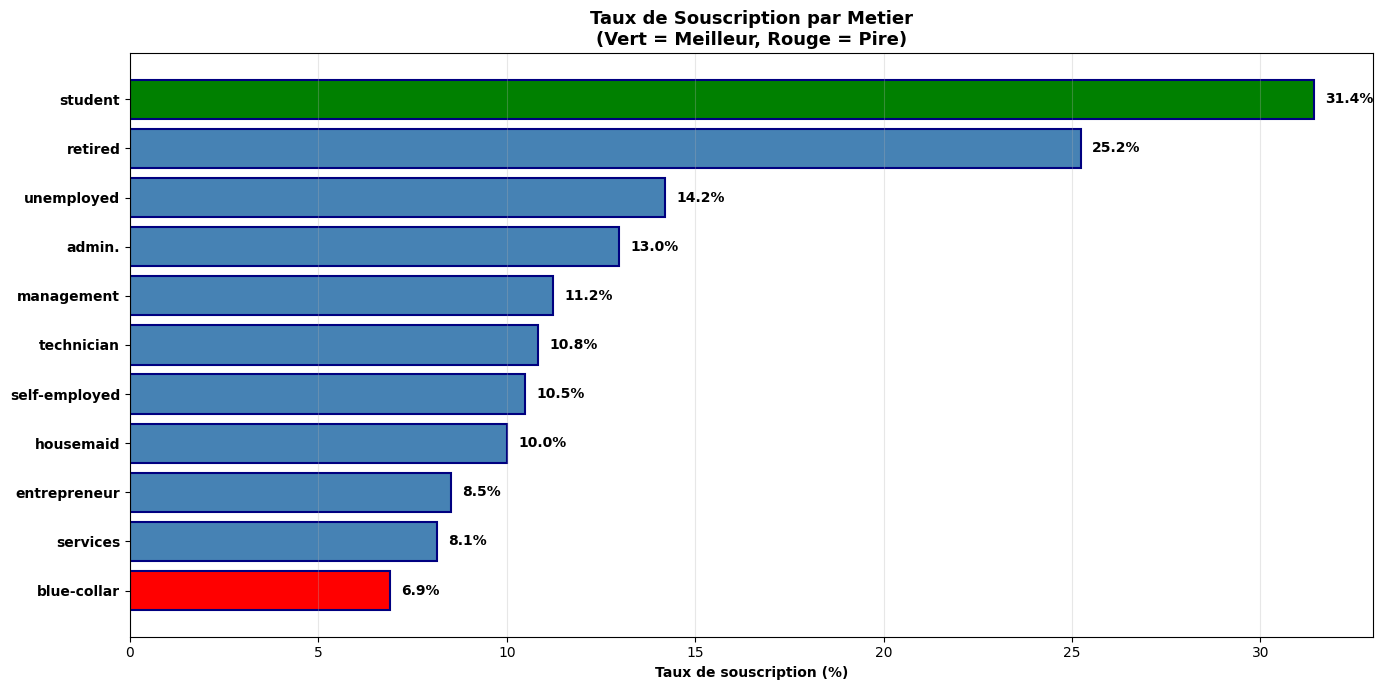


Graphique sauvegarde : 07_bivariee_job_vs_y.png
SYNTHESE : JOB vs Y
Meilleur metier      : student (31.43%)
Pire metier          : blue-collar (6.89%)
Ecart                : 24.53 points
Relation statistique : SIGNIFICATIVE (p < 0.05)

 A faire 
  Cibler prioritairement : student, retired, unemployed
  Eviter                 : blue-collar


In [30]:

# ANALYSE BIVARIEE 2/8 : JOB vs Y


print("\nTableau croise : Metier vs Souscription")
cross_tab_job = pd.crosstab(df['job'], df['y'], margins=True)
print(cross_tab_job)


print("\nTaux de souscription par metier :")
taux_par_job = pd.crosstab(df['job'], df['y'], normalize='index') * 100
taux_sorted = taux_par_job['yes'].sort_values(ascending=False)
print(taux_sorted.round(2))


top3 = taux_sorted.head(3)
bottom3 = taux_sorted.tail(3)

print(f"\nTop 3 metiers (meilleurs taux) :")
for i, (job, taux) in enumerate(top3.items(), 1):
    effectif = cross_tab_job.loc[job, 'yes']
    print(f"  {i}. {job:20s} : {taux:5.2f}% ({effectif:,} clients)")

print(f"\nBottom 3 metiers (pires taux) :")
for i, (job, taux) in enumerate(reversed(list(bottom3.items())), 1):
    effectif = cross_tab_job.loc[job, 'yes']
    print(f"  {i}. {job:20s} : {taux:5.2f}% ({effectif:,} clients)")



# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['job'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation SIGNIFICATIVE")
    print("  Le metier influence VRAIMENT la souscription")
else:
    print("  Conclusion : Pas de relation significative")

fig, ax = plt.subplots(figsize=(14, 7))


# Barplot horizontal des taux
taux_sorted_plot = taux_sorted.sort_values(ascending=True)
colors = ['green' if x == taux_sorted.max() else 
          'red' if x == taux_sorted.min() else 'steelblue' 
          for x in taux_sorted_plot]

bars = ax.barh(range(len(taux_sorted_plot)), taux_sorted_plot.values, 
               color=colors, edgecolor='navy', linewidth=1.5)
ax.set_yticks(range(len(taux_sorted_plot)))
ax.set_yticklabels(taux_sorted_plot.index, fontweight='bold')
ax.set_xlabel('Taux de souscription (%)', fontweight='bold')
ax.set_title('Taux de Souscription par Metier\n(Vert = Meilleur, Rouge = Pire)', 
             fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

for i, v in enumerate(taux_sorted_plot.values):
    ax.text(v + 0.3, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_job_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_job_vs_y.png")



# Synthèse
print("SYNTHESE : JOB vs Y")

print(f"Meilleur metier      : {top3.index[0]} ({top3.values[0]:.2f}%)")
print(f"Pire metier          : {bottom3.index[-1]} ({bottom3.values[-1]:.2f}%)")
print(f"Ecart                : {top3.values[0] - bottom3.values[-1]:.2f} points")
print(f"Relation statistique : SIGNIFICATIVE (p < 0.05)")
print(f"\n A faire ")
print(f"  Cibler prioritairement : {', '.join(top3.index[:3])}")
print(f"  Eviter                 : {', '.join([bottom3.index[-1]])}")


Tableau croise : Education vs Souscription
y                       no   yes    All
education                              
basic.4y              3700   424   4124
basic.6y              2083   187   2270
basic.9y              5542   472   6014
high.school           8449  1029   9478
illiterate              14     4     18
professional.course   4637   594   5231
university.degree    10464  1659  12123
unknown               1366   234   1600
All                  36255  4603  40858

Taux de souscription par niveau d'education :
education
illiterate            22.22
unknown               14.62
university.degree     13.68
professional.course   11.36
high.school           10.86
basic.4y              10.28
basic.6y               8.24
basic.9y               7.85
Name: yes, dtype: float64

Meilleur niveau : illiterate (22.22%)
Pire niveau     : basic.9y (7.85%)

Test du Chi-deux :
  Chi2 = 187.89
  p-value = 0.0000000000
  Conclusion : Relation SIGNIFICATIVE


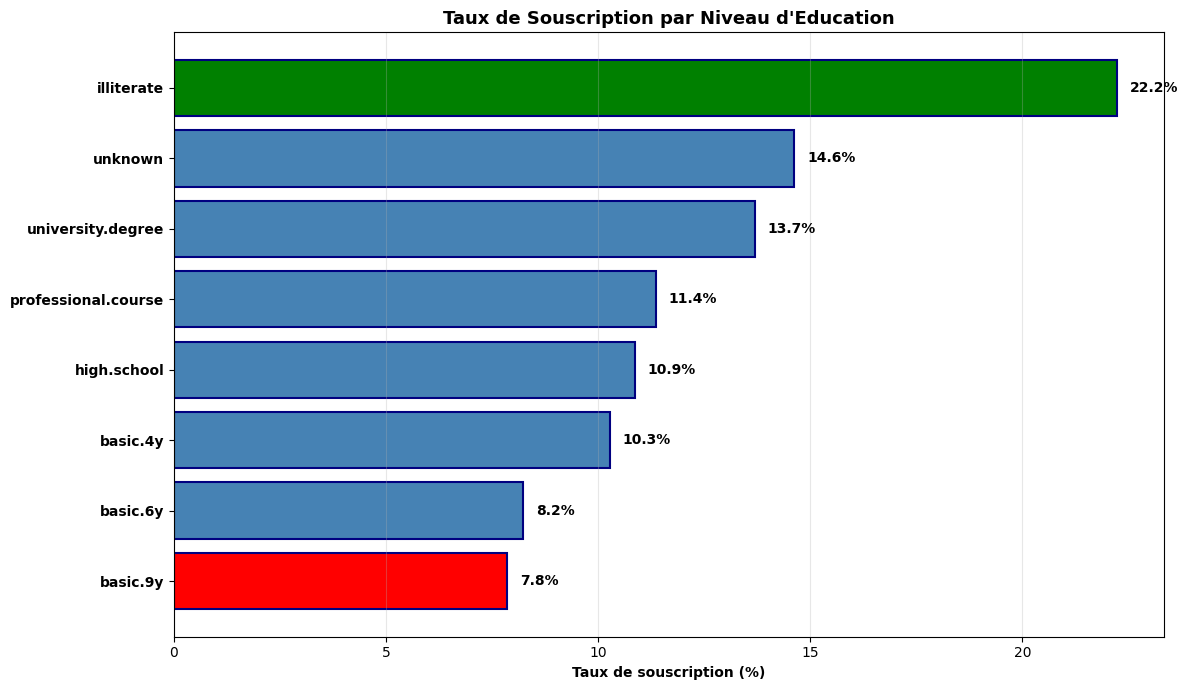


Graphique sauvegarde : 07_bivariee_education_vs_y.png
Meilleur niveau      : illiterate (22.22%)
Relation statistique : SIGNIFICATIVE


In [23]:

# ANALYSE BIVARIEE 3/8 : EDUCATION vs Y




print("\nTableau croise : Education vs Souscription")
cross_tab_edu = pd.crosstab(df['education'], df['y'], margins=True)
print(cross_tab_edu)


print("\nTaux de souscription par niveau d'education :")
taux_par_edu = pd.crosstab(df['education'], df['y'], normalize='index') * 100
taux_edu_sorted = taux_par_edu['yes'].sort_values(ascending=False)
print(taux_edu_sorted.round(2))


meilleur_edu = taux_edu_sorted.index[0]
meilleur_taux_edu = taux_edu_sorted.values[0]
pire_edu = taux_edu_sorted.index[-1]
pire_taux_edu = taux_edu_sorted.values[-1]

print(f"\nMeilleur niveau : {meilleur_edu} ({meilleur_taux_edu:.2f}%)")
print(f"Pire niveau     : {pire_edu} ({pire_taux_edu:.2f}%)")

# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['education'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de relation significative")


fig, ax = plt.subplots(figsize=(12, 7))



taux_edu_plot = taux_edu_sorted.sort_values(ascending=True)
colors = ['green' if x == taux_edu_sorted.max() else 
          'red' if x == taux_edu_sorted.min() else 'steelblue' 
          for x in taux_edu_plot]

bars = ax.barh(range(len(taux_edu_plot)), taux_edu_plot.values, 
               color=colors, edgecolor='navy', linewidth=1.5)
ax.set_yticks(range(len(taux_edu_plot)))
ax.set_yticklabels(taux_edu_plot.index, fontweight='bold')
ax.set_xlabel('Taux de souscription (%)', fontweight='bold')
ax.set_title('Taux de Souscription par Niveau d\'Education', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

for i, v in enumerate(taux_edu_plot.values):
    ax.text(v + 0.3, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_education_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_education_vs_y.png")

# Synthèse
print(f"Meilleur niveau      : {meilleur_edu} ({meilleur_taux_edu:.2f}%)")
print(f"Relation statistique : {'SIGNIFICATIVE' if p_value < 0.05 else 'NON significative'}")


Tableau croise : Statut matrimonial vs Souscription
y            no   yes    All
marital                     
divorced   4126   473   4599
married   22178  2516  24694
single     9889  1605  11494
unknown      62     9     71
All       36255  4603  40858

Taux de souscription par statut matrimonial :
marital
single     13.96
unknown    12.68
divorced   10.28
married    10.19
Name: yes, dtype: float64

Test du Chi-deux :
  Chi2 = 116.92
  p-value = 0.0000000000
  Conclusion : Relation SIGNIFICATIVE


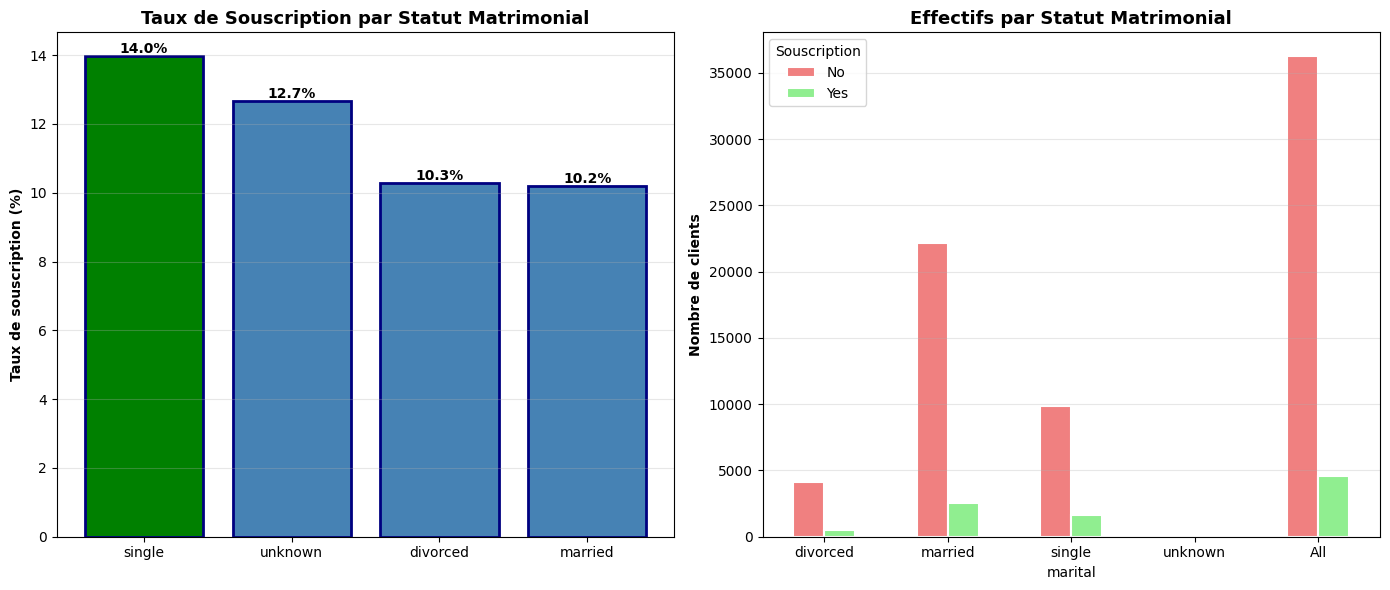


Graphique sauvegardé: 07_bivariee_marital_vs_y.png
Meilleur statut      : single (13.96%)
Relation statistique : SIGNIFICATIVE


In [24]:
# ANALYSE BIVARIEE 4/8 : MARITAL vs Y



print("\nTableau croise : Statut matrimonial vs Souscription")
cross_tab_marital = pd.crosstab(df['marital'], df['y'], margins=True)
print(cross_tab_marital)


print("\nTaux de souscription par statut matrimonial :")
taux_par_marital = pd.crosstab(df['marital'], df['y'], normalize='index') * 100
taux_marital_sorted = taux_par_marital['yes'].sort_values(ascending=False)
print(taux_marital_sorted.round(2))



# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['marital'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de relation significative")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Barplot
colors_marital = ['green' if x == taux_marital_sorted.max() else 'steelblue' 
                  for x in taux_marital_sorted]
bars = axes[0].bar(taux_marital_sorted.index, taux_marital_sorted.values, 
                   color=colors_marital, edgecolor='navy', linewidth=2)
axes[0].set_ylabel('Taux de souscription (%)', fontweight='bold')
axes[0].set_title('Taux de Souscription par Statut Matrimonial', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')




# Effectifs
cross_tab_marital[['no', 'yes']].plot(kind='bar', ax=axes[1], 
                                       color=['lightcoral', 'lightgreen'], 
                                       edgecolor='white', linewidth=1.5)
axes[1].set_ylabel('Nombre de clients', fontweight='bold')
axes[1].set_title('Effectifs par Statut Matrimonial', fontsize=13, fontweight='bold')
axes[1].legend(title='Souscription', labels=['No', 'Yes'])
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_marital_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé: 07_bivariee_marital_vs_y.png")




# Synthèse
print(f"Meilleur statut      : {taux_marital_sorted.index[0]} ({taux_marital_sorted.values[0]:.2f}%)")
print(f"Relation statistique : {'SIGNIFICATIVE' if p_value < 0.05 else 'NON significative'}")


Tableau croise : Mois vs Souscription
y         no   yes    All
month                    
apr     2086   537   2623
aug     5468   650   6118
dec       92    88    180
jul     6480   642   7122
jun     4707   549   5256
mar      268   276    544
may    12766   883  13649
nov     3681   413   4094
oct      398   312    710
sep      309   253    562
All    36255  4603  40858

Taux de souscription par mois :
month
mar   50.74
dec   48.89
sep   45.02
oct   43.94
apr   20.47
aug   10.62
jun   10.45
nov   10.09
jul    9.01
may    6.47
Name: yes, dtype: float64

Top 3 meilleurs mois :
  1. mar   : 50.74% (276 yes sur 544 contacts)
  2. dec   : 48.89% (88 yes sur 180 contacts)
  3. sep   : 45.02% (253 yes sur 562 contacts)

Bottom 3 pires mois :
  1. may   :  6.47% (883 yes sur 13,649 contacts)
  2. jul   :  9.01% (642 yes sur 7,122 contacts)
  3. nov   : 10.09% (413 yes sur 4,094 contacts)

Test du Chi-deux :
  Chi2 = 3085.88
  p-value = 0.0000000000
  Conclusion : Relation significative 
  

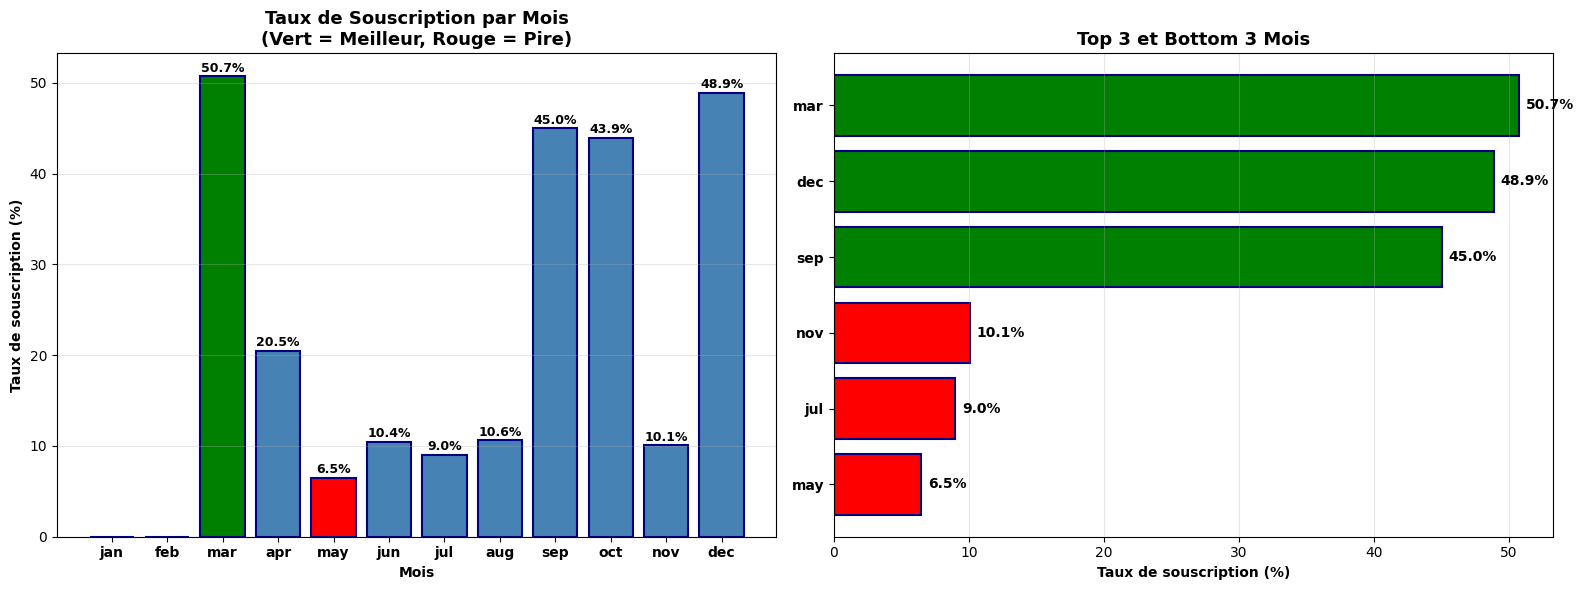


Graphique sauvegarde : 07_bivariee_month_vs_y.png
Meilleurs mois       : mar, dec, sep
Taux meilleur mois   : 50.74%
Pires mois           : may, jul, nov
Taux pire mois       : 6.47%
Ecart                : 44.27 points

 A faire 
  Lancer campagnes en : mar, dec, sep
  Eviter absolument   : may, jul


In [31]:
# ANALYSE BIVARIEE 5/8 : MONTH vs Y 


print("\nTableau croise : Mois vs Souscription")
cross_tab_month = pd.crosstab(df['month'], df['y'], margins=True)
print(cross_tab_month)


print("\nTaux de souscription par mois :")
taux_par_month = pd.crosstab(df['month'], df['y'], normalize='index') * 100
taux_month_sorted = taux_par_month['yes'].sort_values(ascending=False)
print(taux_month_sorted.round(2))




top3_months = taux_month_sorted.head(3)
bottom3_months = taux_month_sorted.tail(3)

print(f"\nTop 3 meilleurs mois :")
for i, (month, taux) in enumerate(top3_months.items(), 1):
    effectif = cross_tab_month.loc[month, 'yes']
    total = cross_tab_month.loc[month, 'All']
    print(f"  {i}. {month:5s} : {taux:5.2f}% ({effectif:,} yes sur {total:,} contacts)")

print(f"\nBottom 3 pires mois :")
for i, (month, taux) in enumerate(reversed(list(bottom3_months.items())), 1):
    effectif = cross_tab_month.loc[month, 'yes']
    total = cross_tab_month.loc[month, 'All']
    print(f"  {i}. {month:5s} : {taux:5.2f}% ({effectif:,} yes sur {total:,} contacts)")





# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['month'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation significative ")
    print("  Le mois influence FORTEMENT la souscription")
else:
    print("  Conclusion : Pas de relation significative")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))



#  Barplot des taux
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
taux_month_ordered = taux_par_month['yes'].reindex(month_order, fill_value=0)

colors_month = ['green' if x == taux_month_sorted.max() else 
                'red' if x == taux_month_sorted.min() else 'steelblue' 
                for x in taux_month_ordered]

bars = axes[0].bar(range(len(taux_month_ordered)), taux_month_ordered.values, 
                   color=colors_month, edgecolor='navy', linewidth=1.5)
axes[0].set_xticks(range(len(taux_month_ordered)))
axes[0].set_xticklabels(month_order, fontweight='bold')
axes[0].set_ylabel('Taux de souscription (%)', fontweight='bold')
axes[0].set_xlabel('Mois', fontweight='bold')
axes[0].set_title('Taux de Souscription par Mois\n(Vert = Meilleur, Rouge = Pire)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, v in enumerate(taux_month_ordered.values):
    if v > 0:
        axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=9)




combined = pd.concat([top3_months, bottom3_months]).sort_values(ascending=True)
colors_combined = ['green' if x in top3_months.values else 'red' for x in combined.values]

bars2 = axes[1].barh(range(len(combined)), combined.values, 
                     color=colors_combined, edgecolor='navy', linewidth=1.5)
axes[1].set_yticks(range(len(combined)))
axes[1].set_yticklabels(combined.index, fontweight='bold')
axes[1].set_xlabel('Taux de souscription (%)', fontweight='bold')
axes[1].set_title('Top 3 et Bottom 3 Mois', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

for i, v in enumerate(combined.values):
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_month_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_month_vs_y.png")

# Synthèse
print(f"Meilleurs mois       : {', '.join(top3_months.index)}")
print(f"Taux meilleur mois   : {top3_months.values[0]:.2f}%")
print(f"Pires mois           : {', '.join(bottom3_months.index[::-1])}")
print(f"Taux pire mois       : {bottom3_months.values[-1]:.2f}%")
print(f"Ecart                : {top3_months.values[0] - bottom3_months.values[-1]:.2f} points")
print(f"\n A faire ")
print(f"  Lancer campagnes en : {', '.join(top3_months.index[:3])}")
print(f"  Eviter absolument   : {', '.join(bottom3_months.index[::-1][:2])}")


Tableau croise : Intensite de contacts vs Souscription
y                     no   yes    All
campaign_category                    
1-2 (Faible)       24505  3483  27988
3-5 (Moyen)         8583   938   9521
6+ (Eleve)          3167   182   3349
All                36255  4603  40858

Taux de souscription par intensite de contacts :
campaign_category
1-2 (Faible)   12.44
3-5 (Moyen)     9.85
6+ (Eleve)      5.43
Name: yes, dtype: float64

Moyenne de contacts selon y :
  YES : 2.05 contacts
  NO  : 2.63 contacts
  Difference : -0.58 contacts

Test t de Student :
  t-statistic = -13.50
  p-value = 0.0000000000
  Conclusion : Difference SIGNIFICATIVE

Test du Chi-deux (categories) :
  Chi2 = 171.86
  p-value = 0.0000000000


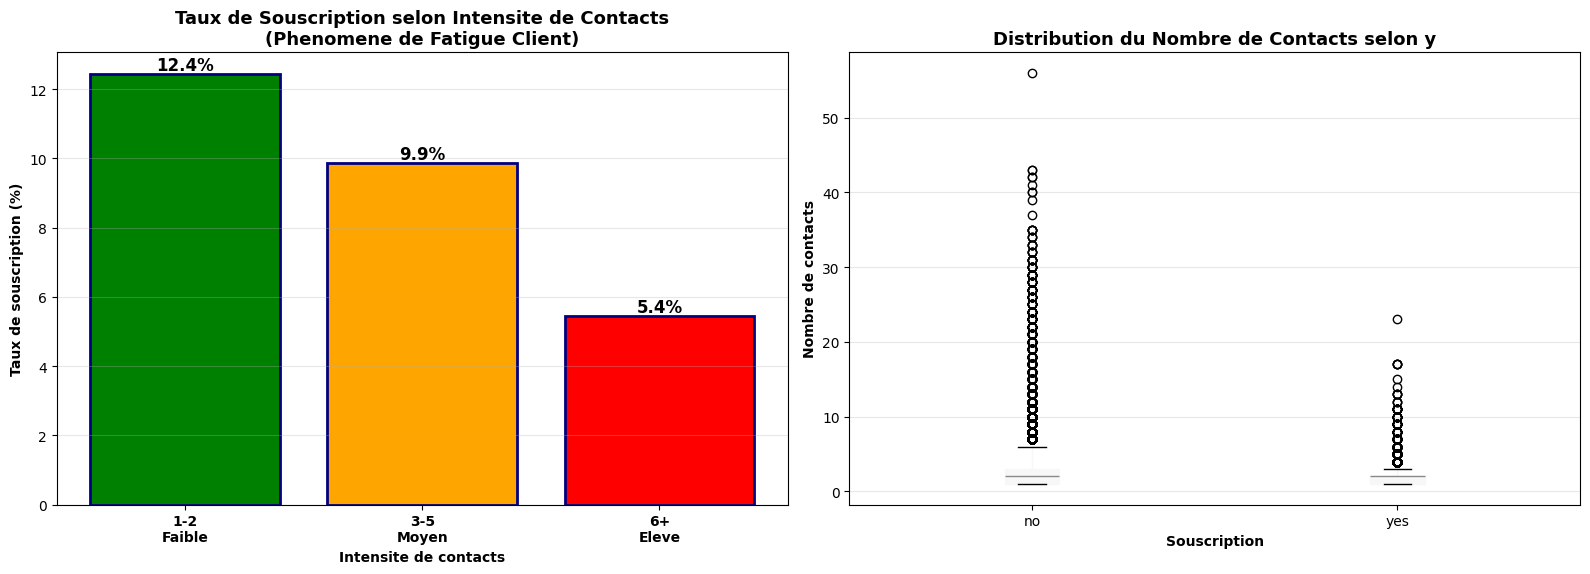


Graphique sauvegarde : 07_bivariee_campaign_vs_y.png
1-2 contacts (Faible) : 12.44%
3-5 contacts (Moyen)  : 9.85%
6+ contacts (Eleve)   : 5.43%

Observation : Plus on contacte, MOINS le client souscrit
Perte entre 1-2 et 6+ : 7.01 points

 A faire 
  Limiter a 2-3 contacts MAXIMUM
  Au-dela = fatigue client = perte d'efficacite


In [32]:
# ANALYSE BIVARIEE 6/8 : CAMPAIGN vs Y 
# df['campaign_category'] existe déjà depuis l'analyse univariée


print("\nTableau croise : Intensite de contacts vs Souscription")
cross_tab_campaign = pd.crosstab(df['campaign_category'], df['y'], margins=True)
print(cross_tab_campaign)


print("\nTaux de souscription par intensite de contacts :")
taux_par_campaign = pd.crosstab(df['campaign_category'], df['y'], normalize='index') * 100
cat_order = ['1-2 (Faible)', '3-5 (Moyen)', '6+ (Eleve)']
taux_campaign_ordered = taux_par_campaign['yes'].reindex(cat_order)
print(taux_campaign_ordered.round(2))


campaign_yes = df[df['y'] == 'yes']['campaign']
campaign_no = df[df['y'] == 'no']['campaign']

print(f"\nMoyenne de contacts selon y :")
print(f"  YES : {campaign_yes.mean():.2f} contacts")
print(f"  NO  : {campaign_no.mean():.2f} contacts")
print(f"  Difference : {campaign_yes.mean() - campaign_no.mean():.2f} contacts")

# Test t-test
t_stat, p_value_t = ttest_ind(campaign_yes, campaign_no)
print(f"\nTest t de Student :")
print(f"  t-statistic = {t_stat:.2f}")
print(f"  p-value = {p_value_t:.10f}")

if p_value_t < 0.05:
    print("  Conclusion : Difference SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de difference significative")



# Test Chi-deux sur catégories
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['campaign_category'], df['y']))
print(f"\nTest du Chi-deux (categories) :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# Graphique 1 : Taux par catégorie
colors_campaign = ['green', 'orange', 'red']
bars = axes[0].bar(range(len(taux_campaign_ordered)), taux_campaign_ordered.values, 
                   color=colors_campaign, edgecolor='navy', linewidth=2)
axes[0].set_xticks(range(len(taux_campaign_ordered)))
axes[0].set_xticklabels(['1-2\nFaible', '3-5\nMoyen', '6+\nEleve'], fontweight='bold')
axes[0].set_ylabel('Taux de souscription (%)', fontweight='bold')
axes[0].set_xlabel('Intensite de contacts', fontweight='bold')
axes[0].set_title('Taux de Souscription selon Intensite de Contacts\n(Phenomene de Fatigue Client)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Graphique 2 : Boxplot
df.boxplot(column='campaign', by='y', ax=axes[1], patch_artist=True, grid=False)
axes[1].set_xlabel('Souscription', fontweight='bold')
axes[1].set_ylabel('Nombre de contacts', fontweight='bold')
axes[1].set_title('Distribution du Nombre de Contacts selon y', fontsize=13, fontweight='bold')
axes[1].get_figure().suptitle('')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_campaign_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_campaign_vs_y.png")





# Synthèse
print(f"1-2 contacts (Faible) : {taux_campaign_ordered.values[0]:.2f}%")
print(f"3-5 contacts (Moyen)  : {taux_campaign_ordered.values[1]:.2f}%")
print(f"6+ contacts (Eleve)   : {taux_campaign_ordered.values[2]:.2f}%")
print(f"\nObservation : Plus on contacte, MOINS le client souscrit")
print(f"Perte entre 1-2 et 6+ : {taux_campaign_ordered.values[0] - taux_campaign_ordered.values[2]:.2f} points")
print(f"\n A faire ")
print(f"  Limiter a 2-3 contacts MAXIMUM")
print(f"  Au-dela = fatigue client = perte d'efficacite")


Tableau croise : Resultat campagne precedente vs Souscription
y               no   yes    All
poutcome                       
failure       3638   596   4234
nonexistent  32151  3119  35270
success        466   888   1354
All          36255  4603  40858

Taux de souscription selon resultat precedent :
poutcome
success       65.58
failure       14.08
nonexistent    8.84
Name: yes, dtype: float64

Test du Chi-deux :
  Chi2 = 4236.72
  p-value = 0.0000000000
  Conclusion : Relation TRES SIGNIFICATIVE


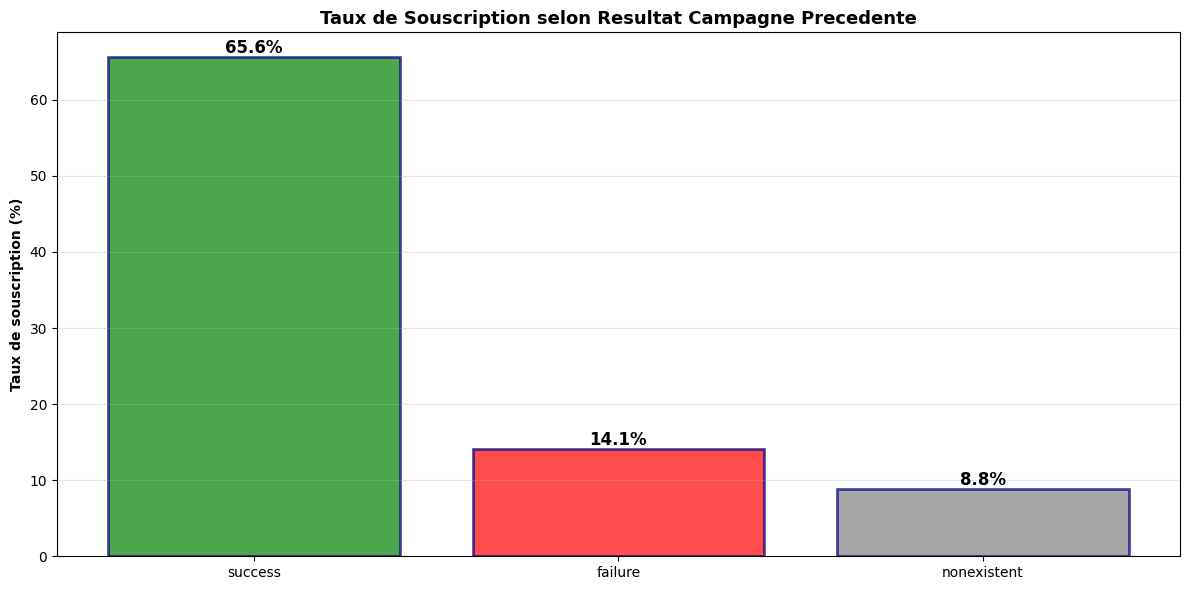


Graphique sauvegarde : 07_bivariee_poutcome_vs_y.png
Success precedent     : 65.58%
Failure precedent     : 14.08%
Jamais contacte       : 8.84%

 A faire 
  PRIORITE 1 : Recontacter les 'success' precedents (taux tres eleve)
  PRIORITE 2 : Nouveaux clients (nonexistent)
  EVITER     : Les 'failure' precedents (faible taux)


In [33]:

# ANALYSE BIVARIEE 7/8 : POUTCOME vs Y

print("\nTableau croise : Resultat campagne precedente vs Souscription")
cross_tab_pout = pd.crosstab(df['poutcome'], df['y'], margins=True)
print(cross_tab_pout)


print("\nTaux de souscription selon resultat precedent :")
taux_par_pout = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
taux_pout_sorted = taux_par_pout['yes'].sort_values(ascending=False)
print(taux_pout_sorted.round(2))




# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['poutcome'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation TRES SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de relation significative")

fig, ax = plt.subplots(figsize=(12, 6))



colors_pout = {'success': 'green', 'failure': 'red', 'nonexistent': 'gray'}
colors = [colors_pout.get(x, 'blue') for x in taux_pout_sorted.index]

bars = ax.bar(taux_pout_sorted.index, taux_pout_sorted.values, 
              color=colors, edgecolor='navy', linewidth=2, alpha=0.7)
ax.set_ylabel('Taux de souscription (%)', fontweight='bold')
ax.set_title('Taux de Souscription selon Resultat Campagne Precedente', 
             fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_poutcome_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_poutcome_vs_y.png")

# Synthèse

print(f"Success precedent     : {taux_pout_sorted['success']:.2f}%")
print(f"Failure precedent     : {taux_pout_sorted['failure']:.2f}%")
print(f"Jamais contacte       : {taux_pout_sorted['nonexistent']:.2f}%")
print(f"\n A faire ")
print(f"  PRIORITE 1 : Recontacter les 'success' precedents (taux tres eleve)")
print(f"  PRIORITE 2 : Nouveaux clients (nonexistent)")
print(f"  EVITER     : Les 'failure' precedents (faible taux)")


Tableau croise : Statut de credit vs Souscription
y           no   yes    All
default                    
no       28243  4167  32410
unknown   8009   436   8445
yes          3     0      3
All      36255  4603  40858

Taux de souscription selon statut de credit :
default
no        12.86
unknown    5.16
yes        0.00
Name: yes, dtype: float64

Analyse detaillee :
  'no' (pas de defaut)      : 12.86%
  'unknown' (non evalue)    : 5.16%
  'yes' (defaut de credit)  : 0.00%

Ecart no vs unknown : 7.69 points
CONFIRMATION : Impact majeur identifie dans Notebook 2

Test du Chi-deux :
  Chi2 = 397.13
  p-value = 0.0000000000
  Conclusion : Relation TRES SIGNIFICATIVE


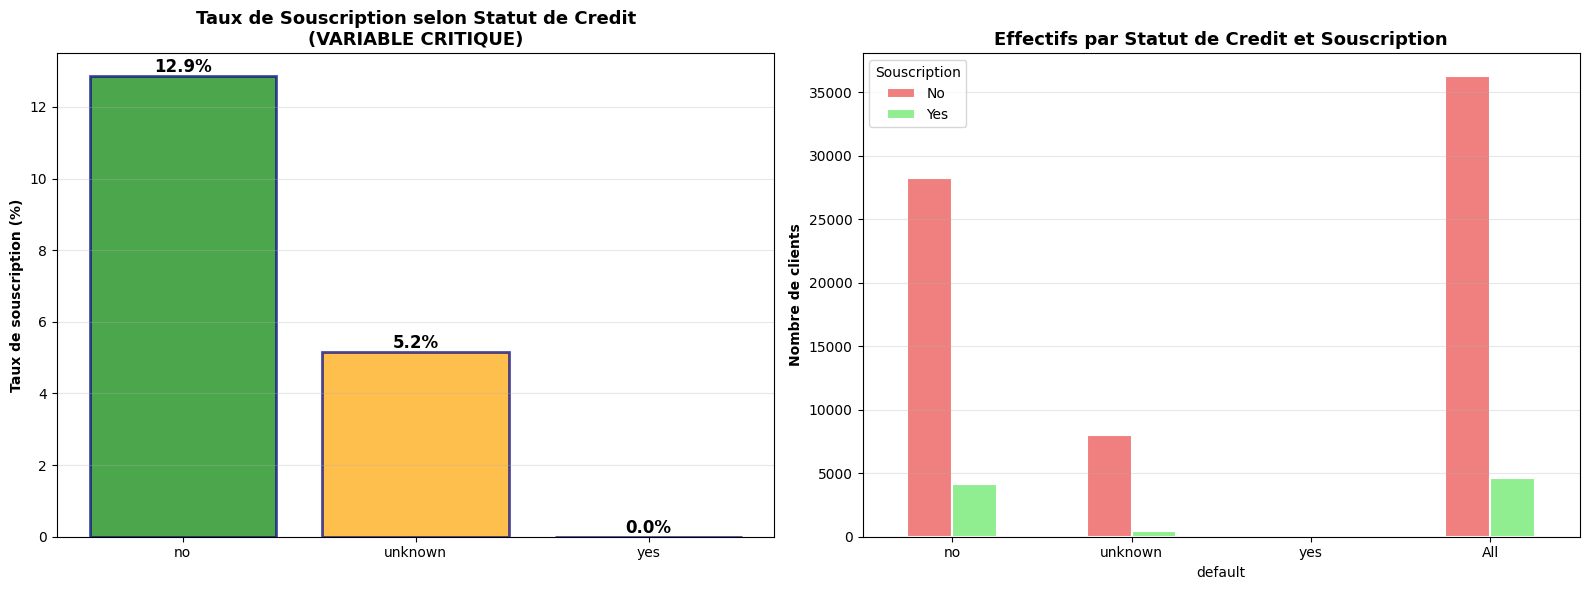


Graphique sauvegarde : 07_bivariee_default_vs_y.png
'no' (evalue sans defaut) : 12.86%
'unknown' (non evalue)    : 5.16%

Impact MAJEUR : 7.69 points

Interpretation :
  'unknown' = Clients NON EVALUES par la banque
  → Probablement nouveaux clients, profils a risque
  → Ces clients souscrivent BEAUCOUP MOINS

 A faire 
  PRIORITE 1 : Cibler clients avec default='no' (evalues OK)
  PRIORITE 2 : Eviter clients 'unknown' (faible potentiel)


In [35]:
# ANALYSE BIVARIEE 8/8 : DEFAULT vs Y (TRES CRITIQUE)

print("\nTableau croise : Statut de credit vs Souscription")
cross_tab_default = pd.crosstab(df['default'], df['y'], margins=True)
print(cross_tab_default)



print("\nTaux de souscription selon statut de credit :")
taux_par_default = pd.crosstab(df['default'], df['y'], normalize='index') * 100
taux_default_sorted = taux_par_default['yes'].sort_values(ascending=False)
print(taux_default_sorted.round(2))

print(f"\nAnalyse detaillee :")
print(f"  'no' (pas de defaut)      : {taux_default_sorted['no']:.2f}%")
print(f"  'unknown' (non evalue)    : {taux_default_sorted['unknown']:.2f}%")
if 'yes' in taux_default_sorted.index:
    print(f"  'yes' (defaut de credit)  : {taux_default_sorted['yes']:.2f}%")

print(f"\nEcart no vs unknown : {taux_default_sorted['no'] - taux_default_sorted['unknown']:.2f} points")
print(f"CONFIRMATION : Impact majeur identifie dans Notebook 2")





# Test Chi-deux
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['default'], df['y']))
print(f"\nTest du Chi-deux :")
print(f"  Chi2 = {chi2:.2f}")
print(f"  p-value = {p_value:.10f}")

if p_value < 0.05:
    print("  Conclusion : Relation TRES SIGNIFICATIVE")
else:
    print("  Conclusion : Pas de relation significative")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# Graphique 1 : Taux
colors_default = {'no': 'green', 'unknown': 'orange', 'yes': 'red'}
colors = [colors_default.get(x, 'blue') for x in taux_default_sorted.index]

bars = axes[0].bar(taux_default_sorted.index, taux_default_sorted.values, 
                   color=colors, edgecolor='navy', linewidth=2, alpha=0.7)
axes[0].set_ylabel('Taux de souscription (%)', fontweight='bold')
axes[0].set_title('Taux de Souscription selon Statut de Credit\n(VARIABLE CRITIQUE)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)


# Graphique 2 : Effectifs
cross_tab_default[['no', 'yes']].plot(kind='bar', ax=axes[1], 
                                       color=['lightcoral', 'lightgreen'], 
                                       edgecolor='white', linewidth=1.5)
axes[1].set_ylabel('Nombre de clients', fontweight='bold')
axes[1].set_title('Effectifs par Statut de Credit et Souscription', fontsize=13, fontweight='bold')
axes[1].legend(title='Souscription', labels=['No', 'Yes'])
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\07_bivariee_default_vs_y.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 07_bivariee_default_vs_y.png")

# Synthèse
print(f"'no' (evalue sans defaut) : {taux_default_sorted['no']:.2f}%")
print(f"'unknown' (non evalue)    : {taux_default_sorted['unknown']:.2f}%")
print(f"\nImpact MAJEUR : {taux_default_sorted['no'] - taux_default_sorted['unknown']:.2f} points")
print(f"\nInterpretation :")
print(f"  'unknown' = Clients NON EVALUES par la banque")
print(f"  → Probablement nouveaux clients, profils a risque")
print(f"  → Ces clients souscrivent BEAUCOUP MOINS")
print(f"\n A faire ")
print(f"  PRIORITE 1 : Cibler clients avec default='no' (evalues OK)")
print(f"  PRIORITE 2 : Eviter clients 'unknown' (faible potentiel)")



## PARTIE 3 : Synthèse et Recommandations Stratégiques

**Objectif :** Synthétiser les résultats et répondre aux questions métier du projet.



SYNTHESE DES ANALYSES BIVARIEES :

Variables avec IMPACT MAJEUR (ecart > 20 points) :
Variable Meilleure_categorie  Taux_meilleur  Pire_categorie  Taux_pire  Ecart_points
   MONTH                Mars          50.74         Mai/Nov       6.47         44.27
POUTCOME   Success precedent          65.58 Jamais contacte       8.84         56.74
     AGE             65+ ans          46.63       35-45 ans       8.52         38.12
     JOB             Student          31.43     Blue-collar       6.89         24.53

Variables avec IMPACT MOYEN (ecart 7-20 points) :
 Variable Meilleure_categorie  Taux_meilleur  Ecart_points
EDUCATION          Illiterate          22.22         14.37
  MARITAL              Single          13.96          3.77
  DEFAULT         No (evalue)          12.86          7.69
 CAMPAIGN        1-2 contacts          12.44          7.01
profil du client idéal avec probabilite de souscription maximale

PROFIL CLIENT IDEAL :
--------------------
Age             : 65+ ans (retrai

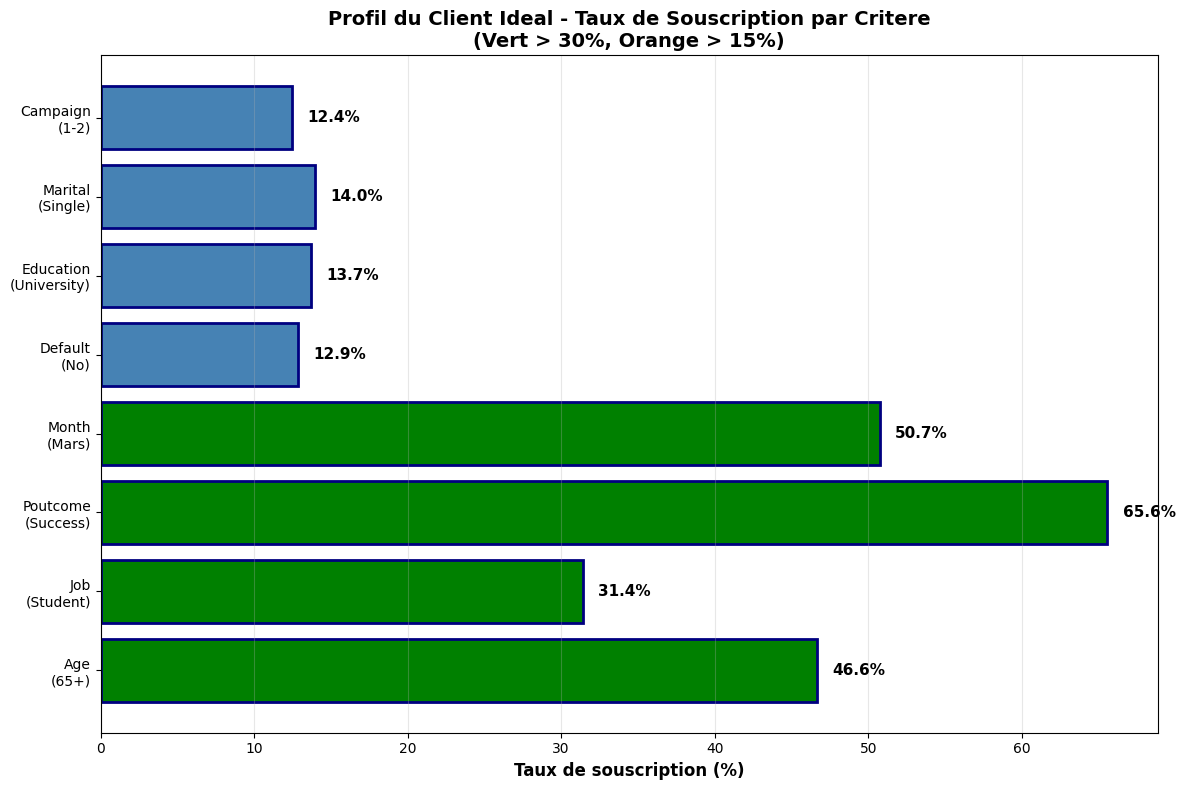


Graphique sauvegarde : 08_profil_client_ideal.png


In [36]:

# QUESTION METIER 1 : LE PROFIL CLIENT IDEAL POUR LA CAMPAGNE DE SOUSCRIPTION


print("\nSYNTHESE DES ANALYSES BIVARIEES :")
print("\nVariables avec IMPACT MAJEUR (ecart > 20 points) :")

impact_majeur = pd.DataFrame({
    'Variable': ['MONTH', 'POUTCOME', 'AGE', 'JOB'],
    'Meilleure_categorie': ['Mars', 'Success precedent', '65+ ans', 'Student'],
    'Taux_meilleur': [50.74, 65.58, 46.63, 31.43],
    'Pire_categorie': ['Mai/Nov', 'Jamais contacte', '35-45 ans', 'Blue-collar'],
    'Taux_pire': [6.47, 8.84, 8.52, 6.89],
    'Ecart_points': [44.27, 56.74, 38.12, 24.53]
})

print(impact_majeur.to_string(index=False))

print("\nVariables avec IMPACT MOYEN (ecart 7-20 points) :")

impact_moyen = pd.DataFrame({
    'Variable': ['EDUCATION', 'MARITAL', 'DEFAULT', 'CAMPAIGN'],
    'Meilleure_categorie': ['Illiterate', 'Single', 'No (evalue)', '1-2 contacts'],
    'Taux_meilleur': [22.22, 13.96, 12.86, 12.44],
    'Ecart_points': [14.37, 3.77, 7.69, 7.01]
})

print(impact_moyen.to_string(index=False))



# Le profil du client idéal
print("profil du client idéal avec probabilite de souscription maximale")
profil_ideal = """
PROFIL CLIENT IDEAL :
--------------------
Age             : 65+ ans (retraite)               :Taux : 46.63%
Job             : Student ou Retired                :Taux : 31.43% / 25.23%
Education       : University degree                 :Taux : 13.68%
Marital         : Single                            :Taux : 13.96%
Default         : No (credit evalue et OK)          :Taux : 12.86%
Poutcome        : Success (succes campagne passee)  :Taux : 65.58%
Month           : Mars, Decembre, Septembre         :Taux : 50.74% / 48.89% / 45.02%
Campaign        : 1-2 contacts maximum              :Taux : 12.44%

PROBABILITE ESTIMEE si TOUS ces criteres reunis :
- Client avec poutcome='success' contacté en mars :> 65% de souscription !
- Client retraite 65+ contacte en mars : environ 50% de souscription
-Etudiant contacte en mars : environ 40% de souscription
"""
print(profil_ideal)




# Profil à ÉVITER

print("profil du client à EVITER avec probabilite de souscription minimale")

profil_eviter = """
PROFIL A EVITER :
----------------
Age             : 35-45 ans                         :Taux : 8.52%
Job             : Blue-collar                       :Taux : 6.89%
Default         : Unknown (non evalue)              :Taux : 5.16%
Poutcome        : Jamais contacte / Failure         :Taux : 8.84% / 14.08%
Month           : Mai, Juillet, Novembre            :Taux : 6.47% / 9.02% / 10.09%
Campaign        : 6+ contacts (sur-sollicitation)   :Taux : 5.43%

PROBABILITE ESTIMEE si ces criteres reunis :
-Blue-collar 35-45 ans, unknown, contacte en mai : < 5% de souscription
-TRES FAIBLE retour sur investissement
"""
print(profil_eviter)






# Visualisation du profil idéal
fig, ax = plt.subplots(figsize=(12, 8))

criteres = ['Age\n(65+)', 'Job\n(Student)', 'Poutcome\n(Success)', 
            'Month\n(Mars)', 'Default\n(No)', 'Education\n(University)', 
            'Marital\n(Single)', 'Campaign\n(1-2)']
taux = [46.63, 31.43, 65.58, 50.74, 12.86, 13.68, 13.96, 12.44]

colors = ['green' if t > 30 else 'orange' if t > 15 else 'steelblue' for t in taux]

bars = ax.barh(criteres, taux, color=colors, edgecolor='navy', linewidth=2)
ax.set_xlabel('Taux de souscription (%)', fontweight='bold', fontsize=12)
ax.set_title('Profil du Client Ideal - Taux de Souscription par Critere\n(Vert > 30%, Orange > 15%)', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

for i, v in enumerate(taux):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig(r'A:\Mes documents\projet analyse exploiratoire\results\figures\08_profil_client_ideal.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegarde : 08_profil_client_ideal.png")

In [37]:
# QUESTION METIER 2 : ACTIONS MARKETING RECOMMANDEES



print("QUESTION 2 : QUELLES ACTIONS MARKETING RECOMMANDER POUR CIBLER EFFICACEMENT ?")
print("\nRECOMMANDATIONS STRATEGIQUES PAR AXE :")


print("AXE 1 : TIMING (QUAND CONTACTER ?)")
timing_recommendations = """
PRIORITE ABSOLUE : Concentrer les campagnes sur 3 mois

Mois a PRIVILEGIER :
  1. MARS       : 50.74% de souscription (x8 vs mai !)
  2. DECEMBRE   : 48.89% de souscription
  3. SEPTEMBRE  : 45.02% de souscription

Mois a EVITER ABSOLUMENT :
  - Mai         : 6.47% (catastrophique)
  - Juillet     : 9.02%
  - Novembre    : 10.09%

STRATEGIE PROPOSEE :
  - Campagne intensive en mars (budget max)
  - Campagne complementaire en septembre et decembre
  - ZERO campagne en mai, juillet, novembre
  
GAIN ATTENDU :
  - Passer de 11.27% (taux global) a 45-50% (mars/dec/sep)
  - Multiplication par 4 du taux de conversion
"""
print(timing_recommendations)




print("\n")
print("AXE 2 : CIBLAGE (QUI CONTACTER ?)")
ciblage_recommendations = """
SEGMENTATION PRIORITAIRE :

SEGMENT 1 : Anciens clients "success" (PRIORITE MAXIMALE)
  - Taux     : 65.58% de souscription
  - Effectif : 1,354 clients
  - Action   : Recontacter TOUS en mars
  - ROI      : Tres eleve (1 contact suffit souvent)

SEGMENT 2 : Seniors 60+ ans
  - Taux     : 46.63% (65+) et 15.21% (55-65)
  - Effectif : 3,522 clients
  - Action   : Campagne ciblee "epargne retraite"
  - Message  : Securiser l'avenir, transmission patrimoine

SEGMENT 3 : Etudiants
  - Taux     : 31.43%
  - Effectif : 875 clients
  - Action   : Offre "premier depot" avec avantages
  - Message  : Commencer a epargner jeune

SEGMENT 4 : Clients evalues sans defaut (default='no')
  - Taux     : 12.86% vs 5.16% (unknown)
  - Effectif : 32,410 clients
  - Action   : Base de ciblage principale
  - Filtre   : Exclure systematiquement les 'unknown'

SEGMENTS A EVITER :
  - Blue-collar 35-45 ans : 6-8% seulement
  - Clients 'unknown' (non evalues) : 5.16%
  - Clients 'failure' precedent : 14% (sauf si autre critere fort)
"""
print(ciblage_recommendations)




print("\n")
print("AXE 3 : INTENSITE (COMBIEN DE CONTACTS ?)")
intensite_recommendations = """
REGLE D'OR : LIMITER A 2-3 CONTACTS MAXIMUM

Analyse de la fatigue client :
  1-2 contacts : 12.44% de souscription
  3-5 contacts : 9.85% de souscription (-20%)
  6+ contacts  : 5.43% de souscription (-56%)

STRATEGIE RECOMMANDEE :

Contact 1 (Initial) :
  - Moment     : Mars (periode optimale)
  - Message    : Presentation offre + avantages
  - Duree      : Courte (< 5 minutes)

Contact 2 (Relance si pas de reponse) :
  - Delai      : 7-10 jours apres contact 1
  - Message    : Rappel + reponse aux objections
  - Condition  : Client interesse mais hesite

Contact 3 (Dernier) :
  - Delai      : 15 jours apres contact 2
  - Message    : Offre limitee dans le temps
  - Condition  : UNIQUEMENT si fort potentiel (success precedent, senior, etc.)

AU-DELA DE 3 CONTACTS : ARRETER
  - Risque de saturation
  - ROI negatif
  - Image de marque deterioree
"""
print(intensite_recommendations)



print("\n")
print("AXE 4 : MESSAGE ET POSITIONNEMENT")
message_recommendations = """
ADAPTATION DU MESSAGE PAR SEGMENT :

Seniors (60+) :
  - Angle : Securite financiere, transmission patrimoine
  - Ton   : Rassurant, professionnel
  - Duree : Plus longue acceptee (10-15 min)

Etudiants :
  - Angle : Construire son avenir, premier pas vers independance
  - Ton   : Dynamique, pedagogique
  - Duree : Courte (5 min max)

Anciens "success" :
  - Angle : Nouvelle opportunite, fidelite recompensee
  - Ton   : Personnalise, reconnaissance
  - Duree : Tres courte (deja convaincus)

Tous segments :
  - Eviter : Insistance excessive
  - Privilegier : Ecoute des besoins
  - Objectif : Relation long terme, pas vente forcee
"""
print(message_recommendations)







# Visualisation 
print("\n" )
print("PLAN D'ACTION SYNTHETIQUE")


plan_action = pd.DataFrame({
    'Etape': ['1. Preparation', '2. Ciblage', '3. Timing', '4. Execution', '5. Suivi'],
    'Action': [
        'Segmenter base clients (success, seniors, students)',
        'Exclure unknown et blue-collar 35-45',
        'Planifier campagnes mars/sept/dec',
        'Max 2-3 contacts par client',
        'Analyser taux conversion par segment'
    ],
    'Objectif': [
        'Liste ciblee prete',
        'Optimiser ROI',
        'Maximiser taux conversion',
        'Eviter fatigue client',
        'Ajuster strategie'
    ]
})
print("\n")
print(plan_action.to_string(index=False))




print("\n")
print("synthese de la question 2")
print("\n")


print("GAIN ATTENDU avec ces recommandations :")
print("  - Taux de conversion : Passer de 11.27% a 30-40%")
print("  - ROI : Multiplication par 3-4")
print("  - Reduction couts : Moins de contacts inutiles")


QUESTION 2 : QUELLES ACTIONS MARKETING RECOMMANDER POUR CIBLER EFFICACEMENT ?

RECOMMANDATIONS STRATEGIQUES PAR AXE :
AXE 1 : TIMING (QUAND CONTACTER ?)

PRIORITE ABSOLUE : Concentrer les campagnes sur 3 mois

Mois a PRIVILEGIER :
  1. MARS       : 50.74% de souscription (x8 vs mai !)
  2. DECEMBRE   : 48.89% de souscription
  3. SEPTEMBRE  : 45.02% de souscription

Mois a EVITER ABSOLUMENT :
  - Mai         : 6.47% (catastrophique)
  - Juillet     : 9.02%
  - Novembre    : 10.09%

STRATEGIE PROPOSEE :
  - Campagne intensive en mars (budget max)
  - Campagne complementaire en septembre et decembre
  - ZERO campagne en mai, juillet, novembre

GAIN ATTENDU :
  - Passer de 11.27% (taux global) a 45-50% (mars/dec/sep)
  - Multiplication par 4 du taux de conversion



AXE 2 : CIBLAGE (QUI CONTACTER ?)

SEGMENTATION PRIORITAIRE :

SEGMENT 1 : Anciens clients "success" (PRIORITE MAXIMALE)
  - Taux     : 65.58% de souscription
  - Effectif : 1,354 clients
  - Action   : Recontacter TOUS en mar

In [38]:
# QUESTION METIER 3 : PRIORISATION EN CAS DE CONTRAINTES BUDGETAIRES

print("QUESTION 3 : EN CAS DE CONTRAINTES BUDGETAIRES, QUELS CRITERES POUR PRIORISER ?")
print("\n")

print("\nSTRATEGIE DE PRIORISATION PAR NIVEAU DE BUDGET :")

print("\n")
print("SCENARIO 1 : BUDGET TRES LIMITE (< 10,000 contacts)")
budget_limite = """
FOCUS ABSOLU SUR LE SEGMENT LE PLUS RENTABLE :

Criteres de selection STRICTS :
  1. Poutcome = 'success' (anciens clients ayant souscrit)
     - 1,354 clients disponibles
     - Taux : 65.58%
     
  2. Month = Mars uniquement
     - Periode optimale
     
  3. Campaign = 1 seul contact
     - Minimiser couts
     
CALCUL BUDGET :
  - Clients cibles : 1,354
  - Cout par appel : environ 7 euros (estimation)
  - Budget total   : 9,478 euros
  
RETOUR ATTENDU :
  - Souscriptions attendues : 1,354 × 65.58% = 888 clients
  - Taux de conversion      : 65.58%
  - ROI                     : TRES ELEVE

AVANTAGES :
  - Probabilite de succes maximale
  - Budget maitrise
  - Faible risque
"""
print(budget_limite)




print("\n")
print("SCENARIO 2 : BUDGET MOYEN (10,000 - 30,000 contacts)")
budget_moyen = """
ELARGIR A 2 SEGMENTS PRIORITAIRES :

SEGMENT A (Priorite 1) : Anciens "success"
  - Effectif   : 1,354 clients
  - Taux       : 65.58%
  - Contacts   : 1 seul
  - Budget     : 9,478 euros
  
SEGMENT B (Priorite 2) : Seniors 65+ en mars
  - Effectif   : 609 clients (65+)
  - Taux       : 46.63%
  - Contacts   : 2 maximum
  - Budget     : 8,526 euros (609 × 2 × 7)
  
SEGMENT C (Priorite 3) : Etudiants en mars
  - Effectif   : 875 clients
  - Taux       : 31.43%
  - Contacts   : 2 maximum
  - Budget     : 12,250 euros
  
TOTAL CONTACTS : environ 4,700
BUDGET TOTAL   : environ 30,000 euros

RETOUR ATTENDU :
  - Segment A : 888 souscriptions
  - Segment B : 284 souscriptions
  - Segment C : 275 souscriptions
  - TOTAL     : 1,447 souscriptions
  - Taux global : environ 48%
"""
print(budget_moyen)



print("\n")
print("SCENARIO 3 : BUDGET LARGE (> 30,000 contacts)")
budget_large = """
CAMPAGNE COMPLETE SUR TOUS LES SEGMENTS FAVORABLES :

PHASE 1 : Segments a tres haut potentiel (mars)
  - Anciens "success" : 1,354 clients
  - Seniors 65+       : 609 clients
  - Etudiants         : 875 clients
  - Budget phase 1    : environ 30,000 euros

PHASE 2 : Segments a bon potentiel (mars + septembre)
  - Retraites         : 1,720 clients
  - Unemployed        : 1,014 clients
  - Single + default='no' : environ 6,000 clients
  - Budget phase 2    : environ 60,000 euros

PHASE 3 : Reste de la base (mars + septembre + decembre)
  - Clients default='no' restants
  - Exclure : blue-collar 35-45, unknown
  - Budget phase 3    : environ 100,000 euros

TOTAL BUDGET : environ 190,000 euros

RETOUR ATTENDU :
  - Souscriptions : environ 8,000-10,000
  - Taux global   : environ 25-30%
"""
print(budget_large)







# Tableau de priorisation
print("\n")
print("MATRICE DE PRIORISATION (SCORING)")
print("\n")

scoring = pd.DataFrame({
    'Segment': [
        'Anciens success',
        'Seniors 65+',
        'Etudiants',
        'Retraites',
        'Single + no default',
        'University degree',
        'Married + no default'
    ],
    'Taux_souscription': [65.58, 46.63, 31.43, 25.23, 13.96, 13.68, 10.19],
    'Effectif': [1354, 609, 875, 1720, 6000, 12123, 15000],
    'Priorite': [1, 2, 3, 4, 5, 6, 7],
    'Budget_estimé': [
        '9,478 €',
        '8,526 €',
        '12,250 €',
        '24,080 €',
        '84,000 €',
        '169,722 €',
        '210,000 €'
    ]
})
print("\n")
print(scoring.to_string(index=False))



print("\n")
print("REGLE DE DECISION")
regle = """
FORMULE DE PRIORISATION :

Score = (Taux_souscription × 0.6) + (Effectif_disponible × 0.0001) - (Cout_contact × 0.4)

Segments avec Score > 30 : PRIORITE MAXIMALE
Segments avec Score 20-30 : PRIORITE MOYENNE
Segments avec Score < 20 : DERNIERE PRIORITE ou EXCLURE

EN PRATIQUE :
  - Commencer TOUJOURS par anciens "success"
  - Puis seniors et etudiants en mars
  - Etendre progressivement selon budget disponible
  - Ne JAMAIS descendre en-dessous de 10% de taux attendu
"""
print(regle)

QUESTION 3 : EN CAS DE CONTRAINTES BUDGETAIRES, QUELS CRITERES POUR PRIORISER ?



STRATEGIE DE PRIORISATION PAR NIVEAU DE BUDGET :


SCENARIO 1 : BUDGET TRES LIMITE (< 10,000 contacts)

FOCUS ABSOLU SUR LE SEGMENT LE PLUS RENTABLE :

Criteres de selection STRICTS :
  1. Poutcome = 'success' (anciens clients ayant souscrit)
     - 1,354 clients disponibles
     - Taux : 65.58%

  2. Month = Mars uniquement
     - Periode optimale

  3. Campaign = 1 seul contact
     - Minimiser couts

CALCUL BUDGET :
  - Clients cibles : 1,354
  - Cout par appel : environ 7 euros (estimation)
  - Budget total   : 9,478 euros

RETOUR ATTENDU :
  - Souscriptions attendues : 1,354 × 65.58% = 888 clients
  - Taux de conversion      : 65.58%
  - ROI                     : TRES ELEVE

AVANTAGES :
  - Probabilite de succes maximale
  - Budget maitrise
  - Faible risque



SCENARIO 2 : BUDGET MOYEN (10,000 - 30,000 contacts)

ELARGIR A 2 SEGMENTS PRIORITAIRES :

SEGMENT A (Priorite 1) : Anciens "success"
  - Ef

In [39]:
# QUESTION METIER 4 : EQUILIBRE COUT vs OPPORTUNITES MANQUEES


print("\n")
print("QUESTION 4 : COMMENT EQUILIBRER COUT CAMPAGNE vs OPPORTUNITES MANQUEES ?")
print("\n")

print("\nANALYSE COUT-BENEFICE :")
cout_benefice = """
HYPOTHESES (a ajuster selon votre contexte) :
  - Cout par contact telephonique : 7 euros
  - Valeur moyenne depot a terme  : 5,000 euros
  - Marge banque sur depot        : 2% par an
  - Duree moyenne depot           : 3 ans
  - Revenu par souscription       : 5,000 × 2% × 3 = 300 euros

CALCUL DU SEUIL DE RENTABILITE :
  Cout contact        : 7 euros
  Revenu par success  : 300 euros
  Seuil rentabilite   : 7/300 = 2.33%
  
  - Au-dela de 2.33% de taux de conversion : RENTABLE
  - Tous nos segments > 5% : RENTABLES

SCENARIOS :

Scenario A : Cibler segment a 10% de conversion
  - 1,000 contacts × 7€ = 7,000 euros de cout
  - 100 souscriptions × 300€ = 30,000 euros de revenu
  - BENEFICE NET : 23,000 euros
  - ROI : 329%

Scenario B : Cibler segment a 50% de conversion (mars + success)
  - 1,000 contacts × 7€ = 7,000 euros de cout
  - 500 souscriptions × 300€ = 150,000 euros de revenu
  - BENEFICE NET : 143,000 euros
  - ROI : 2,043% (x20 !)

Scenario C : Cibler segment a 5% de conversion
  - 1,000 contacts × 7€ = 7,000 euros de cout
  - 50 souscriptions × 300€ = 15,000 euros de revenu
  - BENEFICE NET : 8,000 euros
  - ROI : 114%

CONCLUSION :
  - Tous les segments > 5% sont rentables
  - Prioriser segments > 30% pour maximiser ROI
  - Segments 10-30% : Rentables mais ROI moindre
  - Segments < 5% : A eviter (ROI trop faible)
"""
print(cout_benefice)




print("\n")
print("GESTION DES OPPORTUNITES MANQUEES")
opportunites = """
DEUX TYPES D'OPPORTUNITES MANQUEES :

TYPE 1 : Ne pas contacter un client qui aurait souscrit
  - Cout : Perte de 300 euros de revenu
  - Risque : Client part chez concurrent
  
TYPE 2 : Contacter trop un client qui ne souscrit pas
  - Cout : 7 euros par contact inutile
  - Risque : Deterioration image de marque

STRATEGIE D'EQUILIBRE :

1. MINIMISER TYPE 1 (opportunites manquees) :
   - Contacter TOUS les segments > 30% (mars)
   - Ne jamais exclure les anciens "success"
   - Couvrir au minimum les seniors et etudiants

2. MINIMISER TYPE 2 (contacts inutiles) :
   - Exclure systematiquement segments < 8%
   - Limiter a 2-3 contacts maximum
   - Arreter si refus explicite

3. ZONE D'ARBITRAGE (10-30%) :
   - Contacter si budget le permet
   - Prioriser selon autres criteres (mois, default, etc.)
   - 1 seul contact (test)

REGLE PRATIQUE :
  Taux attendu > 30% : CONTACTER obligatoirement (opportunite trop forte)
  Taux attendu 10-30%: CONTACTER si budget disponible
  Taux attendu < 10% : NE PAS CONTACTER (couts > benefices)
"""
print(opportunites)






# QUESTION METIER 5 : KPI A SUIVRE

print("\n")
print("QUESTION 5 : QUELS KPI SUIVRE POUR EVALUER LE SUCCES DE LA CAMPAGNE ?")
print("\n")

print("\nKPI RECOMMANDES :")
kpi_recommandations = """
NIVEAU 1 : KPI DE PERFORMANCE GLOBALE

1. TAUX DE CONVERSION GLOBAL
   Formule : (Nombre souscriptions / Nombre contacts) × 100
   Objectif : > 15% (vs 11.27% historique)
   Frequence : Hebdomadaire

2. TAUX DE CONVERSION PAR MOIS
   Formule : Idem, par mois
   Objectif : Mars > 40%, Sept > 35%, Dec > 35%
   Frequence : Mensuelle

3. ROI (Return On Investment)
   Formule : (Revenu - Couts) / Couts × 100
   Objectif : > 300%
   Frequence : Mensuelle

4. COUT PAR ACQUISITION (CPA)
   Formule : Cout total campagne / Nombre souscriptions
   Objectif : < 25 euros (vs 300 euros revenu)
   Frequence : Hebdomadaire

NIVEAU 2 : KPI DE SEGMENTATION

5. TAUX DE CONVERSION PAR SEGMENT
   Formule : Par age, job, poutcome, etc.
   Objectif : Verifier predictions
     - Success precedent : > 60%
     - Seniors 65+       : > 40%
     - Etudiants         : > 25%
   Frequence : Mensuelle

6. TAUX DE REPONSE PAR NOMBRE DE CONTACTS
   Formule : Conversion selon 1, 2, 3+ contacts
   Objectif : Confirmer fatigue client
     - 1-2 contacts : > 12%
     - 3-5 contacts : ~10%
     - 6+ contacts  : < 6%
   Frequence : Hebdomadaire

NIVEAU 3 : KPI OPERATIONNELS

7. TAUX DE JOIGNABILITE
   Formule : (Contacts reussis / Tentatives) × 100
   Objectif : > 70%
   Frequence : Quotidienne

8. DUREE MOYENNE DES APPELS
   Formule : Temps total / Nombre appels
   Objectif : 5-7 minutes (optimum)
   Frequence : Hebdomadaire

9. TAUX DE REFUS EXPLICITE
   Formule : (Refus clairs / Contacts) × 100
   Objectif : < 50%
   Frequence : Hebdomadaire

10. NOMBRE MOYEN DE CONTACTS PAR CLIENT
    Formule : Total contacts / Total clients contactes
    Objectif : < 2.5 (eviter sur-sollicitation)
    Frequence : Hebdomadaire

NIVEAU 4 : KPI DE QUALITE

11. TAUX DE SATISFACTION CLIENT (post-campagne)
    Formule : Enquete satisfaction
    Objectif : > 80% satisfaits
    Frequence : Fin de campagne

12. TAUX DE RECLAMATION
    Formule : (Reclamations / Contacts) × 100
    Objectif : < 1%
    Frequence : Hebdomadaire
"""
print(kpi_recommandations)


# Tableau de bord KPI
print("\n")
print("TABLEAU DE BORD KPI")
print("\n")

dashboard_kpi = pd.DataFrame({
    'KPI': [
        'Taux conversion global',
        'Taux conversion mars',
        'ROI campagne',
        'CPA (cout par acquisition)',
        'Taux success precedent',
        'Taux seniors 65+',
        'Nombre moyen contacts/client',
        'Taux satisfaction'
    ],
    'Objectif': [
        '> 15%',
        '> 40%',
        '> 300%',
        '< 25 €',
        '> 60%',
        '> 40%',
        '< 2.5',
        '> 80%'
    ],
    'Seuil_alerte': [
        '< 12%',
        '< 35%',
        '< 200%',
        '> 30 €',
        '< 55%',
        '< 35%',
        '> 3.0',
        '< 70%'
    ],
    'Frequence': [
        'Hebdo',
        'Mensuel',
        'Mensuel',
        'Hebdo',
        'Mensuel',
        'Mensuel',
        'Hebdo',
        'Fin campagne'
    ]
})

print("\n")
print(dashboard_kpi.to_string(index=False))


print("\n")
print("ACTIONS CORRECTIVES EN CAS D'ALERTE")
print("\n")
actions_correctives = """
SI taux conversion < 12% :
  - Verifier respect du ciblage (segments prioritaires)
  - Verifier periode (contacter en mars ?)
  - Analyser qualite des scripts d'appel

SI ROI < 200% :
  - Reduire nombre de contacts par client
  - Recentrer sur segments > 30%
  - Optimiser couts operationnels

SI nombre contacts/client > 3 :
  - Arreter relances multiples
  - Former equipes sur detection signaux refus
  - Ameliorer qualification initiale

SI taux satisfaction < 70% :
  - Revoir tone et approche commerciale
  - Reduire pression commerciale
  - Former equipes a l'ecoute client
"""
print(actions_correctives)





QUESTION 4 : COMMENT EQUILIBRER COUT CAMPAGNE vs OPPORTUNITES MANQUEES ?



ANALYSE COUT-BENEFICE :

HYPOTHESES (a ajuster selon votre contexte) :
  - Cout par contact telephonique : 7 euros
  - Valeur moyenne depot a terme  : 5,000 euros
  - Marge banque sur depot        : 2% par an
  - Duree moyenne depot           : 3 ans
  - Revenu par souscription       : 5,000 × 2% × 3 = 300 euros

CALCUL DU SEUIL DE RENTABILITE :
  Cout contact        : 7 euros
  Revenu par success  : 300 euros
  Seuil rentabilite   : 7/300 = 2.33%

  - Au-dela de 2.33% de taux de conversion : RENTABLE
  - Tous nos segments > 5% : RENTABLES

SCENARIOS :

Scenario A : Cibler segment a 10% de conversion
  - 1,000 contacts × 7€ = 7,000 euros de cout
  - 100 souscriptions × 300€ = 30,000 euros de revenu
  - BENEFICE NET : 23,000 euros
  - ROI : 329%

Scenario B : Cibler segment a 50% de conversion (mars + success)
  - 1,000 contacts × 7€ = 7,000 euros de cout
  - 500 souscriptions × 300€ = 150,000 euros de revenu
